# Introduction

👋 Welcome to the practical sessions of the Generative AI course.

These tutorials are designed to complement the lectures by focusing on the implementation of deep generative models.

Throughout the semester, we will work with various architectures, from basic Neural Networks to Generative Adversarial Networks (GANs) and Diffusion Models.

## 🏫 Session Format

We believe that **"Talk is cheap, show me the code."** Therefore, our tutorials move quickly from theory to practice:

1.  **Concept Overview**: We will briefly walk through the key concepts of each section.
2.  **Active Coding**: Instead of listening to a line-by-line code explanation, you will dive straight in. After each subsection, you will have **3-5 minutes** to run the provided code. We encourage you to modify the parameters or inputs to see how the code behaves under different conditions.
3.  **Challenge & Verify**: At the end of each part, you will tackle a **10-20 minute exercise**. Afterward, we will spend **5 minutes writing the solution live**, allowing you to benchmark your code against ours. Please raise your hand if you get stuck during exercise!
4.  **Smart AI Use**: You have access to Imperial's AI tools via [dAIsy](https://www.imperial.ac.uk/admin-services/ict/training-and-resources/daisy/). Please make good use of it. Using GPT to write exercise code for you is meaningless for your learning. Instead, treat AI as a copilot: ask it about unfamiliar APIs or use it to help debug errors you cannot solve on your own.

## 💻 Computational Environment: Google Colab

We use **Google Colab** as our development environment. This platform provides a standardized Python environment and access to necessary computational resources.

Training deep learning models is computationally intensive. To ensure reasonable training times during the session, please make sure you are connected to a GPU before running any code:

1. Click on **Runtime** in the top menu.
2. Select **Change runtime type**.
3. Under **Hardware accelerator**, select **T4 GPU**.
4. Click **Save**.



## 🛠️ Jupyter Notebook Workflow

We use Jupyter Notebooks for interactive coding. Please follow these operational guidelines:

1. **Code Execution**

- To execute a cell, select it and press Shift + Enter (or click the "Play" button ▶️ on the left of the cell).

2. **Sequential Execution**

- While the Jupyter environment maintains variable states across cells, please remember that if code in one cell relies on variables defined in a previous one, they must be run in order.
- However, most code cells in this tutorial are designed to be **self-contained and executable independently**, so you generally don't need to worry about sequential execution unless specified.

You can run the cell below to verify your environment and ensure the GPU is correctly enabled.

In [ ]:
import torch

print(f"PyTorch Version: {torch.__version__}")

# Check for GPU availability
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"✅ Success! GPU Available: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("⚠️ Warning: GPU not detected. You are running on CPU.")
    print("   -> Please go to 'Runtime' -> 'Change runtime type' -> Select 'T4 GPU'.")

PyTorch Version: 2.9.0+cu126
✅ Success! GPU Available: Tesla T4


# Tutorial 1: Basics of Deep Learning

The primary objective of this session is to translate the theoretical concepts covered in the lecture—Neural Networks, Loss Functions, and Optimization—into practical implementation.

We will utilize **PyTorch**, the standard framework for modern Generative AI research. By the end of this session, you will have constructed a complete training pipeline, which serves as the foundation for the more complex generative models (such as GANs and Diffusion Models) that we will explore later in the course.

> If you are already familiar enough with the use of PyTorch, I recommend you check out some advanced techniques for training large models on this [repo](https://github.com/stas00/ml-engineering/tree/master?tab=readme-ov-file). I believe you will learn something from it.

## Part 1: Pytorch Essential

- **Tensors**: Understanding the fundamental data structure for high-dimensional data.
- **Automatic Differentiation (Autograd)**: How PyTorch computes gradients for optimization automatically.
- This mechanism forms the foundation of the learning process in all deep learning models.

> Adapted from https://docs.pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

### **1.1 Initializing a Tensor**

Tensors are a specialized data structure that are very similar to arrays and matrices.

In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

To build deep learning models, we must first understand how to create Tensors.

#### **1.1.1 Directly from Data**

Tensor is the fundamental data structure in PyTorch with the critical ability to run on hardware accelerators. Every tensor is defined by three essential attributes that you will constantly monitor while building generative models:

- `shape`: The dimensions of the tensor (e.g., the resolution of an image).

- `device`: Where the tensor's data is stored (CPU or an accelerator like GPU).

- `dtype`: The numerical precision of the data (e.g., float32).

When writing deep learning code, most bugs arise from mismatches in these three attributes. Therefore, it is a best practice to check them frequently. You can use the `.to()` method to move a tensor to a different device or change its data type.

In [ ]:
import torch

# Creating a tensor from a Python list
data = [[1, 2], [3, 4]]
data_tensor = torch.tensor(data)

# Determining the available device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Moving the tensor to the accelerator and ensuring it uses float32
# For more dtype, please refer to https://docs.pytorch.org/docs/stable/tensor_attributes.html#torch.dtype
new_tensor = data_tensor.to(device=device, dtype=torch.float32)

print(f"Tensor data:\n{data_tensor}")
print(f"Shape: {data_tensor.shape}")
print(f"Device: from {data_tensor.device} to {new_tensor.device}")
print(f"Data type: from {data_tensor.dtype} to {new_tensor.dtype}")

Tensor data:
tensor([[1, 2],
        [3, 4]])
Shape: torch.Size([2, 2])
Device: from cpu to cuda:0
Data type: from torch.int64 to torch.float32


#### **1.1.2 With Random or Constant Values**

In many scenarios, we need to initialize tensors with specific dimensions by providing a shape tuple. This is common when creating initial noise for a generator or setting up bias vectors.

- `torch.rand()`: Generates values from a **Uniform distribution** [0,1).
- `torch.randn()`: Generates values from a **Standard Normal distribution** (mean 0, variance 1). This is the standard method for initializing noisy latent vectors in diffusion model.
- `torch.zeros()` / `torch.ones()`: Fill the tensor entirely with 0s or 1s, often used for initializing weights or masks.

In [ ]:
import torch

shape = (2, 3)

# Initializing with different distributions
rand_tensor = torch.rand(shape)
randn_tensor = torch.randn(shape)

# Initializing with constants
zeros_tensor = torch.zeros(shape)
ones_tensor = torch.ones(shape)

print(f"Uniform Random:\n{rand_tensor}")
print(f"Normal Random (Gaussian):\n{randn_tensor}")
print(f"Zeros:\n{zeros_tensor}")
print(f"Ones:\n{ones_tensor}")

Uniform Random:
tensor([[0.5568, 0.5304, 0.5529],
        [0.0565, 0.5436, 0.1305]])
Normal Random (Gaussian):
tensor([[ 0.8217, -0.3364, -1.3640],
        [-0.2234, -0.6929,  0.1890]])
Zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Ones:
tensor([[1., 1., 1.],
        [1., 1., 1.]])


#### **1.1.3 From Another Tensor**

When developing models, you often need to create new tensors that match the properties of an existing one. Instead of manually retrieving the shape, device, or data type, you can use the `_like` suffix.

These methods allow you to clone the structural attributes of a reference tensor while filling it with new values. This ensures that your new tensor is automatically compatible with the rest of your computation pipeline, preventing common errors caused by mismatched devices or dimensions.


In [ ]:
import torch

# Create a reference tensor
x_data = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)

# Create new tensors based on x_data's attributes (shape, device, dtype)
x_ones = torch.ones_like(x_data)
x_rand = torch.rand_like(x_data)

print(f"Reference Shape: {x_data.shape}, Device: {x_data.device}, Dtype: {x_data.dtype}")
print(f"Ones Like:\n{x_ones}")
print(f"Random Like:\n{x_rand}")

Reference Shape: torch.Size([2, 2]), Device: cpu, Dtype: torch.float32
Ones Like:
tensor([[1., 1.],
        [1., 1.]])
Random Like:
tensor([[0.3556, 0.2165],
        [0.5916, 0.8796]])


### **1.2 Operations on Tensor**

Now that we know how to create tensors, the next step is to perform computations with them.

In Generative AI, we rarely work with a single number; instead, we manipulate large grids of data.

#### **1.2.1 Basic Arithmetic & Broadcasting**

PyTorch operations are typically element-wise.
When two tensors have the same shape, operations like addition or multiplication are applied to each corresponding pair of elements.

**Broadcasting** is the mechanism that allows operations on tensors of different shapes.
PyTorch automatically expands the smaller tensor to match the larger one without copying data, provided their dimensions are compatible.
Dimensions are compatible when they are either equal or one of them is 1, comparing from the last dimension.

Methods with a trailing underscore (e.g., `add_()`) perform in-place operations. These modify the existing tensor's data directly to save memory, rather than creating a new tensor object.

In [ ]:
import torch

x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])

# Element-wise operations
print(x + y)
print(x * y)

# Broadcasting a scalar
print(x + 10)

# Broadcasting a vector (2,) to a matrix (3, 2)
m = torch.ones(3, 2)        # Shape: (3, 2)
v = torch.tensor([10, 20])  # Shape: (2,)
result = m + v

print(f"Shapes: {m.shape} + {v.shape} -> {result.shape}")
print(result)

# In-place operation
x.add_(5)
print(x)

tensor([5, 7, 9])
tensor([ 4, 10, 18])
tensor([11, 12, 13])
Shapes: torch.Size([3, 2]) + torch.Size([2]) -> torch.Size([3, 2])
tensor([[11., 21.],
        [11., 21.],
        [11., 21.]])
tensor([6, 7, 8])


#### **1.2.2 Linear Algebra Operations**

Linear algebra is the mathematical foundation of deep learning. While * performs element-wise multiplication, neural networks rely on Matrix Multiplication to propagate data through layers.

For standard matrix-matrix or matrix-vector products, we use `torch.matmul()` or the `@` operator. However, in modern Generative AI research, `torch.einsum()` is the preferred tool. It provides a concise way to represent complex operations—like dot products, outer products, transpositions, and batch matrix multiplications—using a single notation.

By specifying the input and output dimension labels (e.g., `'ik,kj->ij'`), you can clearly define how dimensions should be multiplied and summed, making the code much more readable than a sequence of transpose, bmm, and view operations.

In [ ]:
import torch

# Standard Matrix Multiplication
a = torch.randn(3, 4)
b = torch.randn(4, 5)

res_matmul = a @ b  # or torch.matmul(a, b)
print(f"Matmul shape: {res_matmul.shape}")

# Einstein Summation (einsum)
# 'ik,kj->ij' means: multiply on dimension 'k', result is 'ij'
res_einsum = torch.einsum('ik,kj->ij', a, b)
print(f"Einsum shape: {res_einsum.shape}")

# Batch Matrix Multiplication with einsum
# Useful for Attention: (Batch, Head, Seq_L, Dim)
q = torch.randn(2, 8, 16, 64)
k = torch.randn(2, 8, 16, 64)

# Transpose and batch multiply: (b, h, i, d) and (b, h, j, d) -> (b, h, i, j)
attn_scores = torch.einsum('bhid,bhjd->bhij', q, k)
print(f"Attention scores shape: {attn_scores.shape}")

Matmul shape: torch.Size([3, 5])
Einsum shape: torch.Size([3, 5])
Attention scores shape: torch.Size([2, 8, 16, 16])


#### **1.2.3 Indexing, Slicing & Joining**

Manipulating tensors often involves extracting specific sub-regions or merging multiple tensors. Indexing and slicing in PyTorch follow the same conventions as Python and NumPy: you can use `[start:end]` to select ranges across different dimensions.

For combining tensors, the two primary functions are `torch.cat()` and `torch.stack()`:

`torch.cat()` joins a sequence of tensors along an existing dimension.

`torch.stack()` joins tensors along a new dimension, increasing the total number of dimensions by one.

In [ ]:
import torch

x = torch.randn(3, 4)

# Basic Indexing and Slicing
print(x[0, :])      # First row, all columns
print(x[:, 1:3])    # All rows, columns 1 and 2
print(x[-1, -1])    # Last element

# Joining Tensors
t1 = torch.zeros(2, 3)
t2 = torch.ones(2, 3)

# Concatenate along an existing dimension (rows)
res_cat = torch.cat([t1, t2], dim=0)
print(f"Cat shape: {res_cat.shape}")

# Stack along a new dimension
res_stack = torch.stack([t1, t2], dim=0)
print(f"Stack shape: {res_stack.shape}")

tensor([-0.1698,  0.2822, -0.9992,  0.9689])
tensor([[ 0.2822, -0.9992],
        [ 0.2134,  0.2556],
        [ 1.1958, -0.2234]])
tensor(1.2086)
Cat shape: torch.Size([4, 3])
Stack shape: torch.Size([2, 2, 3])


#### **1.2.4 Shape Manipulation**

In Generative AI, you frequently transform tensors between different representations—such as flattening an image into a vector or reordering dimensions for attention mechanisms.

PyTorch stores tensor data as a flat array in memory. The shape of a tensor determines how this data is indexed and interpreted.

- `.unsqueeze()` and `.squeeze()`: These methods add or remove dimensions of size 1. This is necessary when preparing a single sample to be processed as a batch, as neural network layers typically expect a batch dimension.

- `.permute()`: This reorders the dimensions of a tensor. It is often used to switch between different data format conventions, such as moving the channel dimension from the second position to the last.

- `.transpose()`: This swaps two specific dimensions of a tensor. It is commonly used for matrix multiplication adjustments or specific axis swapping, unlike `.permute()` which can reorder all dimensions at once.

- `.view()` and `.reshape()`: Both methods change the dimensions of a tensor. `.view()` changes the shape without copying the underlying data, which makes it highly efficient. However, it only works if new shape does not change its memory layout. `.reshape()` is more robust; it will return a view if possible, but it will automatically copy the data to a new memory location if the current layout does not support the requested shape.

In [ ]:
import torch

x = torch.randn(4, 3, 32, 32)

# Adding a batch dimension
sample = torch.randn(3, 32, 32)
batched_sample = sample.unsqueeze(0)
print(f"Single sample: {sample.shape} -> Batched: {batched_sample.shape}")

# Removing newly added dimension
recovered_sample = batched_sample.squeeze(0)
print(f"Batched: {batched_sample.shape} -> Recovered: {recovered_sample.shape}")

# Removing all dimension with size 1 when no specifying dimension
unsqueezed_sample = x.unsqueeze(0).unsqueeze(2)
squeezed_sample = unsqueezed_sample.squeeze()
print(f"Unsqueezed: {unsqueezed_sample.shape} -> Squeezed: {squeezed_sample.shape}")

# Reordering dimensions (e.g., NCHW to NHWC)
permuted = x.permute(0, 2, 3, 1)
print(f"NCHW shape: {x.shape} -> permuted NHWC shape: {permuted.shape}")

# Swap two dimensions (e.g., NCHW to CNHW)
transposed = x.transpose(0, 1)
print(f"NCHW shape: {x.shape} -> tranposed CNHW shape: {transposed.shape}")

# Flattening spatial dimensions
# The -1 argument calculates the remaining dimension automatically
flattened = x.reshape(4, -1)
print(f"Original: {x.shape} -> Flattened: {flattened.shape}")

# view operation could fail when memory layout does not fit the new one
x = torch.randn(2, 4, 8)
z = x[:, ::2]
try:
  z1 = z.view(-1)
except Exception as e:
  print(f"!!!ERROR MESSAGE: {e}")
print(z.reshape(-1).shape)

Single sample: torch.Size([3, 32, 32]) -> Batched: torch.Size([1, 3, 32, 32])
Batched: torch.Size([1, 3, 32, 32]) -> Recovered: torch.Size([3, 32, 32])
Unsqueezed: torch.Size([1, 4, 1, 3, 32, 32]) -> Squeezed: torch.Size([4, 3, 32, 32])
NCHW shape: torch.Size([4, 3, 32, 32]) -> permuted NHWC shape: torch.Size([4, 32, 32, 3])
NCHW shape: torch.Size([4, 3, 32, 32]) -> tranposed CNHW shape: torch.Size([3, 4, 32, 32])
Original: torch.Size([4, 3, 32, 32]) -> Flattened: torch.Size([4, 3072])
!!!ERROR MESSAGE: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
torch.Size([32])


#### **1.2.5 Reduction & Statistics**

Reduction operations aggregate data in a tensor into a smaller number of elements, often resulting in a single scalar. These operations are fundamental for calculating loss values and performing data normalization.

Common reduction functions include `.mean()`, `.sum()`, `.std()`, and `.max()`. The most important parameter for these functions is `dim`, which specifies the dimension along which the reduction is performed. If you do not specify a dimension, the operation reduces the entire tensor to a single value.

Another critical parameter is `keepdim=True`. This retains the reduced dimension as size 1 instead of removing it. Maintaining the original number of dimensions is often necessary to ensure the resulting tensor remains compatible for broadcasting in later steps of a model.

In [ ]:
import torch

x = torch.arange(12, dtype=torch.float32).reshape(3, 4)
print(f"Original Tensor (3x4):\n{x}")

# Reduce the entire tensor
print(f"Global mean: {x.mean()}, sum: {x.sum()}, std: {x.std()}, max: {x.max()}")

# Reduction along a specific dimension
# dim=0 reduces across rows (collapses the vertical axis)
sum_dim0 = x.sum(dim=0)
print(f"Sum along dim 0: {sum_dim0} (Shape: {sum_dim0.shape})")

# Using keepdim=True
# This is useful for broadcasting back to the original shape
mean_keepdim = x.mean(dim=1, keepdim=True)
print(f"Mean along dim 1 (keepdim=True):\n{mean_keepdim} (Shape: {mean_keepdim.shape})")

Original Tensor (3x4):
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
Global mean: 5.5, sum: 66.0, std: 3.605551242828369, max: 11.0
Sum along dim 0: tensor([12., 15., 18., 21.]) (Shape: torch.Size([4]))
Mean along dim 1 (keepdim=True):
tensor([[1.5000],
        [5.5000],
        [9.5000]]) (Shape: torch.Size([3, 1]))


#### **1.2.6 Replication**

In Generative AI, you often need to replicate a single vector or a small feature map to match the dimensions of a larger tensor. PyTorch provides two primary methods for this: `.expand()` and `.repeat()`.

- `.expand()`: This method increases the size of a tensor by replicating its values across singleton dimensions (dimensions of size 1). It is highly memory-efficient because it does not allocate new memory or copy data; it simply changes the metadata of the tensor to interpret the existing data as being larger.

- `.repeat()`: Unlike expand, this method creates a new tensor and physically copies the data a specified number of times along each dimension. This consumes more memory but results in a tensor where the data is explicitly stored in the new shape.

In [ ]:
import torch

# A vector representing a 3-channel color or style
x = torch.tensor([[1.0, 0.5, 0.0]]) # Shape: (1, 3)

# 1. expand(): Memory-efficient replication
# The dimensions must be compatible (starting from size 1)
expanded = x.expand(4, 3)
print(f"Original: {x.shape} -> Expanded: {expanded.shape}")
print(expanded)

# 2. repeat(): Physical data replication
# Arguments specify how many times to repeat along each dimension
repeated = x.repeat(4, 1)
print(f"Original: {x.shape} -> Repeated: {repeated.shape}")
print(repeated)

# .data_ptr() returns the address of the first element in Tensor
print(f"Original Pointer: {x.data_ptr()}")
print(f"Expanded Pointer: {expanded.data_ptr()} (Same as original)")
print(f"Repeated Pointer: {repeated.data_ptr()} (New memory address)")

Original: torch.Size([1, 3]) -> Expanded: torch.Size([4, 3])
tensor([[1.0000, 0.5000, 0.0000],
        [1.0000, 0.5000, 0.0000],
        [1.0000, 0.5000, 0.0000],
        [1.0000, 0.5000, 0.0000]])
Original: torch.Size([1, 3]) -> Repeated: torch.Size([4, 3])
tensor([[1.0000, 0.5000, 0.0000],
        [1.0000, 0.5000, 0.0000],
        [1.0000, 0.5000, 0.0000],
        [1.0000, 0.5000, 0.0000]])
Original Pointer: 175434048
Expanded Pointer: 175434048 (Same as original)
Repeated Pointer: 158081344 (New memory address)


### **1.3 Autograd: Automatic Differentiation**

Autograd is the engine that powers neural network training. It automatically calculates the derivatives required for optimization by building a dynamic **Computational Graph**. Every time you perform an operation on a tensor, PyTorch records it in this graph, allowing it to apply the chain rule and compute gradients efficiently.

#### **1.3.1 Gradient Tracking and Backward Pass**

To compute gradients for a specific tensor, you must set `requires_grad=True` during initialization or by calling `x.requires_grad_(True)`. This instruction tells PyTorch to track every subsequent operation involving that tensor.

Once you have computed a final scalar value—typically a loss—you call the `.backward()` method. This triggers a traversal of the computational graph from the output back to the inputs, calculating the gradient of the output with respect to each tracked tensor. These calculated values are stored in the `.grad` attribute of the respective tensors.

In [ ]:
import torch

# Create a tensor and enable gradient tracking
# We use float32 as gradients require floating point types
x = torch.tensor([2.0, 3.0], requires_grad=True)

# Define a function: y = 3x^2 + 5
y = 3 * x**2 + 5
# To compute gradients, the output must be a scalar (e.g., the mean)
out = y.mean()

# Compute gradients using backpropagation
out.backward()

# Access the gradient d(out)/dx
# For out = (1/2) * sum(3x^2 + 5), d(out)/dx = 3x
print(f"Gradients on x: {x.grad}")

Gradients on x: tensor([6., 9.])


#### **1.3.2 Disabling Gradient Tracking**

During model evaluation or inference—such as when using a trained GAN to generate images—we do not need to calculate gradients. Tracking these operations consumes memory and slows down computation. We use a context manager `torch.no_grad()` to temporarily disable Autograd, which is essential for efficient generation.

For Tensor, we can use `.requires_grad` attribute to see if it enables gradient. While for the Python context, we use `torch.is_grad_enabled()`. Even within a context where Autograd enabled, we can create a new tensor which shares the same data but is disconnected from the computational graph using `.detach()`.

Sometimes if you want to create a new tensor with autograd relationship to the original one, use `.clone()`.

In [ ]:
import torch

# Create a tensor and enable gradient tracking
x = torch.randn(2, 2, requires_grad=True)
print(f"Tracking enabled for x? {x.requires_grad}")
print(f"Tracking enabled in context? {torch.is_grad_enabled()}")

# During inference, we wrap code in a 'no_grad' context manager
with torch.no_grad():
    print("---------- ENTER torch.no_grad() ----------")
    y_inference = x * 2
    print(f"Tracking enabled for y_inference? {y_inference.requires_grad}")
    print(f"Tracking enabled in context? {torch.is_grad_enabled()}")
    print("---------- LEAVE torch.no_grad() ----------")

print(f"Tracking enabled for x? {x.requires_grad}")
print(f"Tracking enabled in context? {torch.is_grad_enabled()}")

# Another common method is .detach(), which creates a copy of the tensor
# that is no longer linked to the computational graph
y_detached = y.detach()
print(f"Tracking enabled for y_detached? {y_detached.requires_grad}")

# .clone() keep autograd relationship
y_clone = y.clone()
print(f"Tracking enabled for y_clone? {y_clone.requires_grad}")

Tracking enabled for x? True
Tracking enabled in context? True
---------- ENTER torch.no_grad() ----------
Tracking enabled for y_inference? False
Tracking enabled in context? False
---------- LEAVE torch.no_grad() ----------
Tracking enabled for x? True
Tracking enabled in context? True
Tracking enabled for y_detached? False
Tracking enabled for y_clone? True


#### **1.3.3 Gradient Accumulation**

A critical detail in PyTorch is that gradients are accumulated by default. When you call `.backward()`, the newly calculated gradients are added to whatever is currently stored in the `.grad` attribute rather than replacing it.

While this feature is useful for certain advanced techniques—like training with very large effective batch sizes on limited hardware—it means that in a standard training loop, you must explicitly clear the gradients before each update (typically using `optimizer.zero_grad()` which we will introduce later). If you forget to do this, the model will attempt to optimize using a sum of gradients from all previous iterations, leading to incorrect updates.

In [ ]:
import torch

# Create a tensor and enable gradient tracking
x = torch.randn(2, 2, requires_grad=True)

# Example of gradient accumulation
# Re-running backward on the same output
out = (3 * x**2 + 5).mean()
out.backward()
print(f"Gradients after first pass: {x.grad}")

out = (3 * x**3 + 5).mean()
out.backward()
print(f"Gradients after second pass (accumulated): {x.grad}")

# Manually clearing gradients
x.grad.zero_()
print(f"Gradients after clearing: {x.grad}")

# backward again for second pass
out = (3 * x**3 + 5).mean()
out.backward()
print(f"Gradients after second pass (no accumulation): {x.grad}")


Gradients after first pass: tensor([[ 1.4034,  1.0280],
        [-3.3197,  2.0382]])
Gradients after second pass (accumulated): tensor([[3.3727, 2.0849],
        [7.7007, 6.1927]])
Gradients after clearing: tensor([[0., 0.],
        [0., 0.]])
Gradients after second pass (no accumulation): tensor([[ 1.9694,  1.0568],
        [11.0204,  4.1545]])


### **1.4 Exercise: Manual Gradient Verification**

In this exercise, you will simulate a single forward pass of a Linear Layer followed by a Mean Squared Error (MSE) loss. Your goal is to compute the gradient of the loss with respect to the weights manually and then verify that PyTorch’s `.backward()` produces the exact same result.

**Scenario**:
Consider a simple linear transformation followed by a Mean Squared Error (MSE) loss:
1. **Forward Pass**: $y = Wx$
2. **Loss**: $L = \text{mean}((y - t)^2)$

**Challenge**:
Your goal is to calculate the gradient $\frac{\partial L}{\partial W}$ manually. Mathematically, the gradient is derived as:
$$
\frac{\partial L}{\partial W} = \frac{2}{n} (y - t) x^T,
$$
where $n$ is the number of elements in the output vector $y$.

**Requirements**:

1. **Initialization**:
    - $x$: a constant vector with values $[1,2,3]$.
    - $t$: a vector of size `(2,)` using Uniform distribution $[0, 1)$.
    - Move tensors $x$ and $t$ to device `cuda` and dtype `torch.float32`
    - $W$: a `2x3` matrix using a Standard Normal distribution with device `cuda` specified and gradient tracking enabled alongside initialization.
2. **Standard Autograd Workflow**:
    - Compute the predicted output $y$.
    - Compute the MSE loss.
    - Execute the backward pass to calculate the gradient of $W$.
3. **Manual Gradient Calculation**:
    - Disable gradient tracking.
    - Calculate the error vector $(y - t)$.
    - Properly align the dimensions of the difference vector and $x$ to perform a matrix product that results in a `2x3` matrix.
    - Account for the scaling factor introduced by the mean operation.

The provided verification code at the end of the cell will automatically compare your manual_grad with PyTorch's `W.grad`.

In [ ]:
import torch

################################################################################
# 1. Initialization - TODO
#   1) x: size (3), a constant vector with values [1,2,3]
#   2) t: size (2), uniform distribution [0,1)
#   3) Move tensors $x$ and $t$ to device `cuda` and dtype `torch.float32`
#   4) W: a `2x3` matrix using a Standard Normal distribution with device `cuda`
#      specified and gradient tracking enabled alongside initialization.
################################################################################

# TODO: Your code here
x = torch.tensor([1, 2, 3]) # (3,)
t = torch.rand((2,))
x = x.to(device="cuda", dtype=torch.float32)
t = t.to(device="cuda", dtype=torch.float32)
W = torch.randn((2, 3), device="cuda", requires_grad=True)

################################################################################
# 2. Standard Autograd Workflow - TODO
#   1) Compute y = Wx
#   2) Compute loss = mean((y - t)^2)
#   3) Trigger the backward pass
################################################################################

# TODO: Your code here
y = W @ x
loss = torch.mean((y - t) * (y - t))
loss.backward()

################################################################################
# 3. Manual Gradient Calculation - TODO
#   1) Disable gradient tracking
#   2) Calculate the error vector (y - t)
#   3) Properly align the dimensions of the error vector and input x to
#      perform a matrix product that results in a 2x3 matrix.
#   4) Account for the scaling factor introduced by the mean operation
# HINT: The shape of grad should be the same as the tensor itself!!!
################################################################################

# TODO: Your code here
with torch.no_grad():
    error = (y - t)  # (2,)
    manual_grad = error.unsqueeze(1) @ x.unsqueeze(0)
    manual_grad = manual_grad * 2 / y.shape[0]

################################################################################
# --- Verification Code (Implemented) ---
print("-" * 30)
pytorch_grad = W.grad.clone() if (W is not None and W.grad is not None) else None
if pytorch_grad is not None and manual_grad is not None:
    is_correct = torch.allclose(pytorch_grad, manual_grad)
    print(f"PyTorch Gradient:\n{pytorch_grad}")
    print(f"Manual Gradient:\n{manual_grad}")
    print(f"Match Found: {is_correct}")
else:
    print("Please complete the TODO sections to run the verification.")
################################################################################

------------------------------
PyTorch Gradient:
tensor([[ -4.4239,  -8.8477, -13.2716],
        [  0.7544,   1.5087,   2.2631]], device='cuda:0')
Manual Gradient:
tensor([[ -4.4239,  -8.8477, -13.2716],
        [  0.7544,   1.5087,   2.2631]], device='cuda:0')
Match Found: True


## Part 2: Building Neural Networks

- **Layer**: Learn basic building blocks that frequently used in Generate AI.
- **Module**: Learn to wrap layers and forward logic into cascaded structures using the `nn.Module` base class.
- A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

> Adapted from https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

### **2.1 Layers with Parameters**

In the previous part, we manually managed weights and biases as raw tensors. In practice, PyTorch provides basic **layers** that automatically initialize and store their own **learnable parameters**.

In Generative AI, these parameters represent the **knowledge** the model acquires. When we say we are training a diffusion model, we are actually updating the weight matrices stored inside these layers to better map noise into realistic pixels.

#### **2.1.1 Linear Layers**

Linear layers are the simplest building blocks in neural networks, implementing matrix multiplication with an optional bias term. Let's see how to create and use them with `nn.Linear`. The key parameters are `in_features` and `out_features`, with an optional `bias` parameter (defaults to True). The layer works on inputs of any shape, applying the linear transformation to the last dimension only.

In PyTorch, each layer has its own default initialization method, but you can also manually initialize weights using the `nn.init` functions. For linear layers, common weight initializations include Xavier, Kaiming, and Normal distributions, while biases are typically initialized to zeros or ones.

In [ ]:
import torch
import torch.nn as nn

# Create a linear layer: 10 input features → 5 output features
linear_layer = nn.Linear(in_features=10, out_features=5)

# Check automatically initialized parameters
print("Weight shape:", linear_layer.weight.shape)  # (5, 10)
print("Bias shape:", linear_layer.bias.shape)      # (5,)

# Create input data: batch size=3, features=10
x = torch.randn(3, 10)
y = linear_layer(x)
print("Input shape:", x.shape)
print("Output shape:", y.shape)  # (3, 5)

# Linear layers work with multi-dimensional inputs
x_3d = torch.randn(2, 3, 10)
y_3d = linear_layer(x_3d)
print("\n3D input handling:")
print("Input shape:", x_3d.shape)
print("Output shape:", y_3d.shape)  # (2, 3, 5)

# For more initialization methods, please refer to https://docs.pytorch.org/docs/stable/nn.init.html
# Please note the underscore suffix indicates in-place operation
xavier_weight = nn.init.xavier_uniform_(linear_layer.weight)  # Xavier initialization
kaiming_weight = nn.init.kaiming_uniform_(linear_layer.weight, nonlinearity='relu')  # Kaiming initialization
normal_weight = nn.init.normal_(linear_layer.weight, mean=0.0, std=0.01)  # Normal distribution

zeros_bias = nn.init.zeros_(linear_layer.bias)
ones_bias = nn.init.ones_(linear_layer.bias)  # Sometimes useful to initialize bias to ones

Weight shape: torch.Size([5, 10])
Bias shape: torch.Size([5])
Input shape: torch.Size([3, 10])
Output shape: torch.Size([3, 5])

3D input handling:
Input shape: torch.Size([2, 3, 10])
Output shape: torch.Size([2, 3, 5])


#### **2.1.2 Convolution Layers**

Convolutional layers are essential for processing grid-like data such as images. They apply filters (kernels) that slide across the input to extract local patterns and spatial hierarchies. PyTorch provides `nn.Conv1d`, `nn.Conv2d`, and `nn.Conv3d` for 1D, 2D, and 3D convolutions respectively, with `nn.Conv2d` being the most commonly used for image processing.

The key parameters of a convolution layer include `in_channels`, `out_channels`, `kernel_size`, `stride`, `padding`, and `dilation`. The layer outputs a feature map where each channel corresponds to one filter's response across the input.

The spatial dimensions of the output feature map can be calculated using this formula:

$$
\text{Output} = \lfloor \frac{\text{Input}+2\times \text{Padding}-\text{Kernel}\quad}{\text{Stride}}\rfloor + 1
$$

Where $\lfloor \cdot \rfloor$ denotes floor division (rounding down). `padding` adds zeros around the input border, while `stride` determines how many pixels the filter moves each step.

> From https://github.com/vdumoulin/conv_arithmetic

Here is an animated demonstration showing how different `nn.Conv2d` parameters affect the output, and it assumes that height and width are the same.

However, you may encounter cases where the aspect ratio is not 1, and there may even be more than two dimensions (for example `nn.Conv3d`).
In such cases these parameters need to be specified separately for each dimension.

Note that blue maps are inputs, and cyan maps are outputs.
**I, P, K, S, D** are short for input size (in height/width, not channels), `Padding`, `Kernel`, `Stride` and `Dilation`, respectively.


<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/refs/heads/master/gif/no_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/refs/heads/master/gif/arbitrary_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/refs/heads/master/gif/same_padding_no_strides.gif"></td>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/refs/heads/master/gif/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>I=4, P=0, K=3, S=1, D=1</td>
    <td>I=5, P=2, K=4, S=1, D=1</td>
    <td>I=5, P=1, K=3, S=1, D=1</td>
    <td>I=5, P=2, K=3, S=1, D=1</td>
  </tr>
  <tr>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/refs/heads/master/gif/no_padding_strides.gif"></td>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/refs/heads/master/gif/padding_strides.gif"></td>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/refs/heads/master/gif/padding_strides_odd.gif"></td>
    <td><img width="150px" src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/refs/heads/master/gif/dilation.gif"</td>
  </tr>
  <tr>
    <td>I=5, P=0, K=3, S=2, D=1</td>
    <td>I=5, P=1, K=3, S=2, D=1</td>
    <td>I=6, P=1, K=3, S=2, D=1</td>
    <td>I=7, P=0, K=3, S=1, D=2</td>
  </tr>
</table>

In [ ]:
import torch
import torch.nn as nn

# Create a 2D convolutional layer (Example 1 in illustration)
conv_layer = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=0)
print("Weight shape:", conv_layer.weight.shape)  # (16, 8, 3, 3)
print("Bias shape:", conv_layer.bias.shape)      # (16,)

# Create a sample input: batch=2, channels=8, height=4, width=4
x = torch.randn(2, 8, 4, 4)
y = conv_layer(x)

print("Input shape:", x.shape)
print("Output shape:", y.shape)  # (2, 16, 2, 2)

# Demonstrating different parameter configurations
print("\nDifferent convolution configurations:")

# Example 2
conv1 = nn.Conv2d(8, 16, kernel_size=4, stride=1, padding=2)
x1 = torch.randn(2, 8, 5, 5)
y1 = conv1(x1)
print(f"Example 2: {x1.shape} → {y1.shape}")  # (2, 16, 6, 6)

# Example 7
conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1)
x2 = torch.randn(2, 8, 6, 6)
y2 = conv2(x2)
print(f"Example 7: {x2.shape} → {y2.shape}")  # (2, 16, 3, 3)

# Example 8
conv3 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=0, dilation=2)
x3 = torch.randn(2, 8, 7, 7)
y3 = conv3(x3)
print(f"Example 8: {x3.shape} → {y3.shape}")  # (2, 16, 3, 3)

Weight shape: torch.Size([16, 8, 3, 3])
Bias shape: torch.Size([16])
Input shape: torch.Size([2, 8, 4, 4])
Output shape: torch.Size([2, 16, 2, 2])

Different convolution configurations:
Example 2: torch.Size([2, 8, 5, 5]) → torch.Size([2, 16, 6, 6])
Example 7: torch.Size([2, 8, 6, 6]) → torch.Size([2, 16, 3, 3])
Example 8: torch.Size([2, 8, 7, 7]) → torch.Size([2, 16, 3, 3])


#### **2.1.3 Normalization Layers**

Normalization layers stabilize and accelerate neural network training by normalizing activations. Different normalization methods operate on different dimensions of the input tensor, each suited for specific architectures and tasks.

Consider an input tensor of shape $(N, C, H, W)$, where each dimension represents batch, channel, height and width, respectively.

There are currently four commonly used normalization methods:

- **BatchNorm**: Normalizes across the batch dimension $(N)$ and spatial dimensions $(H, W)$ for each channel $(C)$. It computes one mean and variance per channel across all samples in the batch.

- **LayerNorm**: Normalizes across the channel dimension $(C)$ and spatial dimensions $(H, W)$ for each sample $(N)$. It computes one mean and variance per sample across all channels.

- **InstanceNorm**: Normalizes across the spatial dimensions $(H, W)$ for each channel $(C)$ of each sample $(N)$. It computes separate statistics for each channel in each sample.

- **GroupNorm**: Divides channels into groups and normalizes across the group dimension and spatial dimensions $(H, W)$ for each sample $(N)$. It's a compromise between LayerNorm and InstanceNorm.

The illustration below shows the different combinations of these dimensions. You may need to look carefully at the subtle differences between them.

> From https://github.com/facebookresearch/Detectron/tree/main/projects/GN

<img width="100%" src="https://raw.githubusercontent.com/facebookresearch/Detectron/refs/heads/main/projects/GN/gn.jpg">

In PyTorch, these normalization layers are implemented with specific ways to define the normalization scope:

- `nn.BatchNorm` and `nn.InstanceNorm`: Use 1D, 2D, or 3D variants (`BatchNorm1d/2d/3d`, `InstanceNorm1d/2d/3d`) to handle different data types. The number indicates how many spatial dimensions are included in the normalization (like 1D for sequences, 2D for images, 3D for videos). The `num_features` parameter specifies the number of channels.

- `nn.LayerNorm`: Requires you to explicitly specify the shape of dimensions to normalize via the `normalized_shape` parameter. This can be a single integer (normalizing just the last dimension) or a tuple (normalizing multiple trailing dimensions).
    - Plese note that this API can fairly support various normalization ways and is not limited to the paradigm ($C\times H\times W$) as indicated in the figure above.

- `nn.GroupNorm`: Requires both `num_groups` (how many groups to divide channels into) and `num_channels` (total number of channels). The layer automatically splits channels into groups and normalizes within each group.

All these layers include learnable scale (weight $\gamma$) and shift (bias $\beta$) parameters by specifying `affine=True` at channel dimension (except `elementwise_affine` in `nn.LayerNorm` at per-element):
$$
y=\frac{x-\text{E}[x]}{\surd (\text{Var}[x]+\epsilon)}*\gamma+\beta
$$



In [ ]:
import torch
import torch.nn as nn

# Create a sample input: batch=4, channels=8, height=16, width=16
x = torch.randn(4, 8, 16, 16)

# 1. Batch Normalization (nn.BatchNorm)
# Normalizes across N, H, W dimensions for each C
# Important notes: Since training has the concept of batches while inference does not,
#   BatchNorm uses the mean and variance computed from the current training batch during training,
#   while maintains a running average for use in inference.
batch_norm = nn.BatchNorm2d(num_features=8, affine=True)
y_bn = batch_norm(x)
print("BatchNorm:")
print(f"  running_mean shape: {batch_norm.running_mean.shape}")  # (C,)
print(f"  running_var shape: {batch_norm.running_var.shape}")    # (C,)
print(f"  weight shape: {batch_norm.weight.shape}")  # (C,)
print(f"  bias shape: {batch_norm.bias.shape}")      # (C,)

# 2. Layer Normalization (LayerNorm)
# Normalizes across C, H, W dimensions for each N
layer_norm = nn.LayerNorm([8, 16, 16], elementwise_affine=True)  # Normalize last 3 dimensions
y_ln = layer_norm(x)
print("\nLayerNorm:")
print(f"  weight shape: {layer_norm.weight.shape}")  # (C, H, W) -> (8, 16, 16)
print(f"  bias shape: {layer_norm.bias.shape}")      # (C, H, W) -> (8, 16, 16)

# 3. Instance Normalization (nn.InstanceNorm)
# Normalizes across H, W dimensions for each C in each N
instance_norm = nn.InstanceNorm2d(num_features=8, affine=True)
y_in = instance_norm(x)
print("\nInstanceNorm:")
print(f"  weight shape: {instance_norm.weight.shape}")  # (C,) -> (8,)
print(f"  bias shape: {instance_norm.bias.shape}")      # (C,) -> (8,)

# 4. Group Normalization (GroupNorm)
# Divides C into groups, normalizes across group and H, W for each N
group_norm = nn.GroupNorm(num_groups=4, num_channels=8, affine=True)  # 8 channels ÷ 4 groups = 2 channels/group
y_gn = group_norm(x)
print("\nGroupNorm (4 groups):")
print(f"  weight shape: {group_norm.weight.shape}")  # (C,) -> (8,)
print(f"  bias shape: {group_norm.bias.shape}")      # (C,) -> (8,)

# Output shape will not change for normalization!
# Other types of layer normalization:
layer_norm_at_spatial = nn.LayerNorm(16 * 16, elementwise_affine=True)
_ = layer_norm_at_spatial(x.reshape(4, 8, -1))  # (4, 8, 16, 16) -> (4, 8, 256)
layer_norm_at_channel = nn.LayerNorm(8, elementwise_affine=True)
_ = layer_norm_at_channel(x.reshape(4, 8, -1).transpose(1, 2)) # (4, 8, 16, 16) -> (4, 8, 256) -> (4, 256, 8)

BatchNorm:
  running_mean shape: torch.Size([8])
  running_var shape: torch.Size([8])
  weight shape: torch.Size([8])
  bias shape: torch.Size([8])

LayerNorm:
  weight shape: torch.Size([8, 16, 16])
  bias shape: torch.Size([8, 16, 16])

InstanceNorm:
  weight shape: torch.Size([8])
  bias shape: torch.Size([8])

GroupNorm (4 groups):
  weight shape: torch.Size([8])
  bias shape: torch.Size([8])


### **2.2 Layers without Parameter**

In the previous sections, we focused on layers that contain learnable parameters such as weights and biases. However, not all layers in a neural network need to learn from data. Some layers perform fixed operations that are crucial for network performance and stability.

These parameter-free layers serve various purposes: transforming spatial dimensions, introducing non-linearities and preventing overfitting. Unlike parameterized layers, they don't store any state that gets updated during training, but they play essential roles in shaping the information flow through the network.

#### **2.2.1 Pooling Layers**

Pooling layers are used to reduce the spatial dimensions of feature maps while preserving the most important information. They help decrease computational complexity and provide basic translation invariance. Unlike convolutional layers which use learned filters to extract features, pooling layers apply fixed operations like taking the maximum or average within sliding windows. In this section we also introduce the reverse operation of pooling, namely upsampling.

PyTorch offers several types of pooling-related operations, where their hyperparameter settings are similar with convolutional layers:

- `nn.MaxPool1d/2d/3d`: Takes the maximum value in each window, preserving the most prominent features

- `nn.AvgPool1d/2d/3d`: Takes the average value in each window, providing smoother downsampling

- `nn.AdaptiveMaxPool1d/2d/3d` & `nn.AdaptiveAvgPool1d/2d/3d`: Automatically adjusts pooling to produce a fixed output size regardless of input dimensions, which is particularly useful when dealing with variable-sized inputs

- `nn.Upsample`: Increases spatial dimensions through interpolation, sometimes used in generative models for decoding from latent representations to pixel space

These layers have no learnable parameters - they simply apply fixed mathematical operations over the input.


In [ ]:
import torch
import torch.nn as nn

# Create a sample input: batch=2, channels=3, height=8, width=8
x = torch.randn(2, 3, 8, 8)

# 1. Basic MaxPooling and AvgPooling (similar to convolution but with fixed operations)
max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

y_max = max_pool(x)
y_avg = avg_pool(x)

print("nn.MaxPool2d(kernel_size=2, stride=2):")
print(f"  {x.shape} → {y_max.shape}")
print("  Operation: For each 2x2 window, output the maximum value")

print("\nnn.AvgPool2d(kernel_size=2, stride=2):")
print(f"  {x.shape} → {y_avg.shape}")
print("  Operation: For each 2x2 window, output the average value")

# 2. Adaptive Pooling - produces fixed output size regardless of input size
# Useful for handling inputs of varying dimensions
print("\n" + "=" * 60)
print("Adaptive Pooling (guaranteed output size):")

# Adaptive Average Pooling to 4x4 output
adaptive_avg_pool = nn.AdaptiveAvgPool2d(output_size=(4, 4))
y_adaptive_avg = adaptive_avg_pool(x)
print(f"nn.AdaptiveAvgPool2d(output_size=(4, 4)):")
print(f"  {x.shape} → {y_adaptive_avg.shape}")
print("  Use case: Ensures fixed-size output for variable input sizes")

# Global Average Pooling (to 1x1 output) - often used before fully connected layers
global_avg_pool = nn.AdaptiveAvgPool2d(output_size=(1, 1))
y_global_avg = global_avg_pool(x)
print(f"\nnn.AdaptiveAvgPool2d(output_size=(1, 1)) - Global Average Pooling:")
print(f"  {x.shape} → {y_global_avg.shape}")
print("  Use case: Reduces each feature map to a single value")

# 3. Upsample/Interpolate - increasing spatial dimensions
# Commonly used in generative models and decoder networks
print("\n" + "=" * 60)
print("Upsample/Interpolation (increasing dimensions):")

# Upsample by a scale factor
# scale_factor indicates multiplier for spatial size, support 1D/2D/3D at all
# mode = ['nearest', 'bilinear', 'bicubic']
upsample = nn.Upsample(scale_factor=2, mode='bilinear')
y_upsample = upsample(x)
print(f"nn.Upsample(scale_factor=2, mode='bilinear'):")
print(f"  {x.shape} → {y_upsample.shape}")
print("  Use case: Decoding from latent space to pixel space in generative models")

nn.MaxPool2d(kernel_size=2, stride=2):
  torch.Size([2, 3, 8, 8]) → torch.Size([2, 3, 4, 4])
  Operation: For each 2x2 window, output the maximum value

nn.AvgPool2d(kernel_size=2, stride=2):
  torch.Size([2, 3, 8, 8]) → torch.Size([2, 3, 4, 4])
  Operation: For each 2x2 window, output the average value

Adaptive Pooling (guaranteed output size):
nn.AdaptiveAvgPool2d(output_size=(4, 4)):
  torch.Size([2, 3, 8, 8]) → torch.Size([2, 3, 4, 4])
  Use case: Ensures fixed-size output for variable input sizes

nn.AdaptiveAvgPool2d(output_size=(1, 1)) - Global Average Pooling:
  torch.Size([2, 3, 8, 8]) → torch.Size([2, 3, 1, 1])
  Use case: Reduces each feature map to a single value

Upsample/Interpolation (increasing dimensions):
nn.Upsample(scale_factor=2, mode='bilinear'):
  torch.Size([2, 3, 8, 8]) → torch.Size([2, 3, 16, 16])
  Use case: Decoding from latent space to pixel space in generative models


#### **2.2.2 Non-linear Activations**

Non-linear activation functions are essential components in neural networks that introduce non-linear transformations, allowing networks to learn complex patterns and relationships. Without activation functions, multiple linear layers would collapse into a single linear transformation, severely limiting the network's representational power.

PyTorch provides a comprehensive collection of activation functions, all of which are parameter-free operations. These functions are typically applied element-wise to the outputs of linear or convolutional layers.

PyTorch provides a variety of activation functions in ``torch.nn``, each implemented as a parameter-free module. Here are some commonly used ones:

- `nn.ReLU` implements the Rectified Linear Unit defined as $f(x) = \max(0, x)$.

- `nn.Sigmoid` implements the Sigmoid function defined as $f(x) = \frac{1}{1 + e^{-x}}$.

- `nn.Tanh` implements the hyperbolic tangent function defined as $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$.

- `nn.LeakyReLU` implements the Leaky Rectified Linear Unit defined as $$
f(x) = \begin{cases}
x & \text{if } x \geq 0 \\
\alpha x & \text{if } x < 0
\end{cases}
$$

- `nn.GELU` implements the Gaussian Error Linear Unit defined as $f(x) = x \cdot \Phi(x)$ where $\Phi(x)$ is the cumulative distribution function of the Gaussian distribution, approximated as $f(x)=0.5 * x * (1 + \text{Tanh}(\sqrt{2/\pi} * (x+0.044715 * x^3)))$

- `nn.SiLU` (also known as Swish) implements the Sigmoid Linear Unit defined as $f(x) = x \cdot \text{sigmoid}(x)$.

Their formulas are all listed, of which only `nn.LeakyReLU` has a hyperparameter $\alpha$, and the others contain no hyperparameters.
The choice of activation functions in generative models is primarily an engineering consideration that requires extensive experiments through ablation studies, as there is no universal solution suitable to all scenarios.

Below, I have plotted these six activation functions through code for easy comparison. The visualization code uses the `matplotlib` library, which requires input data to be in `numpy` format. `Numpy` arrays can easily be converted using `tensor.numpy()`, but be careful that the tensor must be on the CPU and not on the GPU.




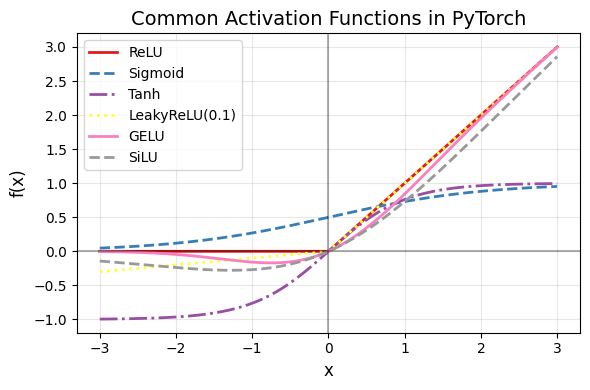

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Create sample data
x = torch.linspace(-3, 3, 200)

# Define activation functions
activations = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'LeakyReLU(0.1)': nn.LeakyReLU(0.1),
    'GELU': nn.GELU(),
    'SiLU': nn.SiLU()
}

# Plot all activation functions together
plt.figure(figsize=(6, 4))

# Plot each activation function with different colors and line styles
colors = plt.cm.Set1(np.linspace(0, 1, len(activations)))
line_styles = ['-', '--', '-.', ':', '-', '--']

for idx, (name, activation) in enumerate(activations.items()):
    y = activation(x)
    plt.plot(x.numpy(), y.numpy(),
             label=name,
             color=colors[idx],
             linestyle=line_styles[idx],
             linewidth=2)

# Configure plot
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Common Activation Functions in PyTorch', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

plt.show()

#### **2.2.3 Dropout Layers**

Dropout is a regularization technique that helps prevent overfitting by randomly setting a fraction of input units to zero during training. This forces the network to learn more robust features that are not reliant on specific connections between neurons. In PyTorch, dropout is primarily implemented as `nn.Dropout`.

The key characteristic of dropout layers is their different behavior during training and evaluation:

- **Training mode**: Randomly zeros elements with probability p

- **Evaluation mode**: Passes input unchanged (no dropout applied)

Furthermore, outputs are scaled by $1/(1-p)$ to maintain the expected value during training.

It is worth noting that the training mode and evaluation mode are switched by calling `.train()` and `.eval()` on the module, and the current state can be obtained through `.training` as an attribute.




In [ ]:
import torch
import torch.nn as nn

# Create sample data
x = torch.randn(4, 10, 8, 8)  # batch=4, channels=10, height=8, width=8
print("Input shape:", x.shape)

# 1. Basic Dropout
dropout = nn.Dropout(p=0.3)
x_flat = x.view(4, -1)  # Flatten for 1D dropout
y = dropout(x_flat)
print("\nnn.Dropout(p=0.3):")
print(f"  Input shape: {x_flat.shape}")
print(f"  Output shape: {y.shape}")
print(f"  Zeros ratio: {(y == 0).float().mean():.3f} (target: 0.3)")

# 2. Training vs Evaluation mode
test_input = torch.ones(1, 10)
print("\nTraining vs Evaluation mode comparison:")

# Training mode
dropout.train()
train_output = dropout(test_input.clone())
print(f"  Training mode - zeros: {(train_output == 0).sum().item()}/10")

# Evaluation mode
dropout.eval()
eval_output = dropout(test_input.clone())
print(f"  Evaluation mode - zeros: {(eval_output == 0).sum().item()}/10")

Input shape: torch.Size([4, 10, 8, 8])

nn.Dropout(p=0.3):
  Input shape: torch.Size([4, 640])
  Output shape: torch.Size([4, 640])
  Zeros ratio: 0.298 (target: 0.3)

Training vs Evaluation mode comparison:
  Training mode - zeros: 2/10
  Evaluation mode - zeros: 0/10


### **2.3 Functional Operations**

In the previous sections, we covered many layers—both those with parameters and those without. In fact, each of them has a functional version.
For layers with parameters, the functional form helps when you need manual control over learnable parameters. For layers without parameters, it offers more flexibility in complex forward logic.

In this section, we'll also highlight operations commonly used in generative models that are typically called as functions, not initialized as layers.

#### **2.3.1 Functional Version of Previous Layers**

All layers we've covered have functional equivalents in `torch.nn.functional` (typically imported as `F`). The key distinction is state management: modules store parameters internally, while functional forms accept them as arguments, giving you explicit control.

For **parameterized layers**, this is essential for weight sharing and dynamic architectures:

- `nn.Linear` → `F.linear(input, weight, bias)`
- `nn.Conv1d/2d/3d` → `F.conv1d/2d/3d(input, weight, bias, ...)`
- `nn.BatchNorm` → `F.batch_norm(input, running_mean, running_var, ...)` (you manage statistics)
- `nn.LayerNorm/InstanceNorm/GroupNorm` → `F.layer_norm/instance_norm/group_norm(input, weight=..., bias=...)` (statistics computed per-input)

For **non-parameterized layers**, functional forms offer flexibility in complex forward logic:

- Pooling: `nn.AvgPool2d` → `F.avg_pool2d`; `nn.MaxPool2d` → `F.max_pool2d`; `nn.AdaptiveAvgPool2d` → `F.adaptive_avg_pool2d`
- Upsampling: `nn.Upsample` → `F.interpolate(input, size, mode='bilinear')` (core for diffusion decoders)
- Activations: `nn.ReLU/GELU/SiLU` → `F.relu/gelu/silu(input, inplace=False)`
- Dropout: `nn.Dropout` → `F.dropout(input, p, training=self.training)` (must pass training flag explicitly)

This direct interface is crucial for research prototypes and advanced generative models. We won't go into much detail on this part. It would be enough for you to know having such a flexible option. When you want to use it, just look up how to use the API from official website (https://docs.pytorch.org/docs/stable/nn.functional.html).


In [ ]:
import torch
import torch.nn.functional as F

# Input: batch=2, channels=3, height=4, width=4
x = torch.randn(2, 3, 4, 4)

# Linear: weight(out_features, in_features), bias(out_features)
weight, bias = torch.randn(5, 48), torch.randn(5)
out_linear = F.linear(x.view(2, -1), weight, bias)

# Conv2d: weight(out_channels, in_channels, kH, kW)
weight, bias = torch.randn(5, 3, 3, 3), torch.randn(5)
out_conv = F.conv2d(x, weight, bias, padding=1)

# BatchNorm: pass running_mean, running_var explicitly
weight, bias = torch.randn(5), torch.randn(5)
running_mean, running_var = torch.zeros(5), torch.ones(5)
out_bn = F.batch_norm(out_conv, running_mean, running_var, training=True, weight=weight, bias=bias)

# Layer/Instance/Group Norm: compute stats per-input
weight, bias = torch.randn(3, 4, 4), torch.randn(3, 4, 4)
out_ln = F.layer_norm(x, normalized_shape=[3, 4, 4], weight=weight, bias=bias)

weight, bias = torch.randn(3), torch.randn(3)
out_in = F.instance_norm(x, weight=weight, bias=bias)
out_gn = F.group_norm(x, num_groups=1, weight=weight, bias=bias)

# Pooling: stateless operations
out_avg = F.avg_pool2d(x, kernel_size=2)
out_max = F.max_pool2d(x, kernel_size=2)
out_adaptive = F.adaptive_avg_pool2d(x, output_size=1)

# Upsampling: core for diffusion decoders
out_up = F.interpolate(x, scale_factor=2, mode='bilinear')

# Activations: element-wise transforms
out_relu = F.relu(x)
out_gelu = F.gelu(x)
out_silu = F.silu(x)

# Dropout: MUST pass training flag explicitly!
out_dropout = F.dropout(x, p=0.5, training=True)

#### **2.3.2 Frequently Used Operations**

Now let's look at some operations that you'll call directly as functions rather than initializing as layers. These are building blocks you'll use repeatedly when writing custom forward passes.

**Attention Mechanisms**

First, let's cover the attention operations that are fundamental to many modern architectures.

- `F.softmax` normalizes input along a specified dimension:
$$
\text{softmax}(x_i) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}.
$$
Usually, before using this method, we divide the logits by a temperature to control how sharp or smooth the distribution becomes.

- `F.scaled_dot_product_attention` computes the core attention operation: it takes `query`, `key`, and `value` tensors, plus an optional `attn_mask`. Mathematically, it performs:
$$
\text{Attention}(Q,K,V) = \text{softmax}(\frac{QK^T}{\sqrt{d_k}})V
$$
The function automatically handles scaling, masking, and the weighted sum. It returns the attention output and optionally the attention weights.
    - The `attn_mask` argument can be used to prevent attention to certain positions by setting those entries to `-inf` before the softmax.
    - For autoregressive tasks (like GPT), you can instead set the boolean `is_causal=True`, which automatically applies a triangular mask to prevent attending to future positions and is typically more memory-efficient than passing a manual tensor.

**Loss Functions**

Next, we'll look at the loss functions that define how models learn.

- `F.binary_cross_entropy_with_logits` computes:
$$
\text{loss} = -[y*\log(\sigma(x)) + (1-y)*\log(1-\sigma(x))],
$$
where $\sigma$ is the `sigmoid` function. It takes `input` (raw logits) and `target` tensors.

- `F.mse_loss` calculates mean squared error:
$$
\text{loss} = \frac{1}{n}\sum(y_i - \hat{y_i})^2.
$$
It expects `input` and `target` tensors, with a `reduction` parameter to sum or average the result.

- `F.kl_div` computes KL divergence:
$$
\text{loss} = \sum y_i * (\log y_i - x_i).
$$
It requires `input` as log-probabilities and `target` as probabilities. The `log_target` parameter lets you provide both in log-space for numerical stability.








In [ ]:
import torch
import torch.nn.functional as F

# Setup: batch=2, seq_len=10, feature_dim=64
Q = torch.randn(2, 10, 64)
K = torch.randn(2, 10, 64)
V = torch.randn(2, 10, 64)

# 1. Scaled Dot-Product Attention
attn_out = F.scaled_dot_product_attention(Q, K, V)

# Option A: Manual mask (-inf values are ignored/masked)
mask = torch.zeros(10, 10)
mask.masked_fill_(torch.triu(torch.ones(10, 10, dtype=torch.bool), diagonal=1), float('-inf'))
attn_out_masked = F.scaled_dot_product_attention(Q, K, V, attn_mask=mask)

# Option B: is_causal=True (Equivalent to Option A, but optimized)
attn_out_causal = F.scaled_dot_product_attention(Q, K, V, is_causal=True)

# Verify both methods produce the same result
print(f"Results match: {torch.allclose(attn_out_masked, attn_out_causal)}")

# 2. Softmax with temperature
logits = torch.randn(2, 10)

# Standard softmax
probs = F.softmax(logits, dim=-1)

# Temperature scaling: lower temp = sharper distribution
sharp_probs = F.softmax(logits / 0.5, dim=-1)
smooth_probs = F.softmax(logits / 2.0, dim=-1)

# 3. Binary Cross-Entropy with Logits (binary classification)
# Input: raw logits, Target: 0 or 1 (must be in [0,1])
logits = torch.randn(2, 1)  # predictions for 2 samples
targets = torch.tensor([[1.0], [0.0]])  # 1=positive class, 0=negative class

bce_loss = F.binary_cross_entropy_with_logits(logits, targets)

# 4. MSE Loss (reconstruction error)
predictions = torch.randn(2, 3, 4, 4)
ground_truth = torch.randn(2, 3, 4, 4)

mse = F.mse_loss(predictions, ground_truth)
print(f"\ndefault MSE loss reduction (mean): {mse}")

# With sum reduction (instead of mean) for custom weighting
mse_sum = F.mse_loss(predictions, ground_truth, reduction='sum')
print(f"MSE loss reduction in sum: {mse_sum}")

# 5. KL Divergence
# Input: log-probabilities, Target: probabilities
log_p = torch.log_softmax(torch.randn(2, 10), dim=-1)
logit_q = torch.randn(2, 10)
q = torch.softmax(logit_q, dim=-1)

# reduction could be none to get raw results for further statistics
kl_loss = F.kl_div(log_p, q, reduction='none')
print(f"\nKL loss shape with reduction none: {kl_loss.shape}")

# With log_target for numerical stability
log_q = torch.log_softmax(logit_q, dim=-1)
kl_log = F.kl_div(log_p, log_q, log_target=True, reduction='none')
assert torch.allclose(kl_loss, kl_log)


Results match: True

default MSE loss reduction (mean): 2.1463890075683594
MSE loss reduction in sum: 206.0533447265625

KL loss shape with reduction none: torch.Size([2, 10])


### **2.4 Module Initialization and Forwarding**

Up to this point, we've worked with individual layers as standalone components. But real neural networks are built by combining these layers into larger structures. This is where `nn.Module` becomes essential.

Every layer we've used—whether it's `nn.Linear`, `nn.Conv2d`, or `nn.ReLU`—is actually a subclass of `nn.Module`. This base class provides the infrastructure that makes PyTorch's modular design work.




#### **2.4.1 Custom Module**

When building a custom network, you create a class that inherits from `nn.Module`. In `__init__`, you define your layers as attributes, storing them for later use. Then, you implement the `forward` method to specify exactly how data flows through these layers, calling them like functions.

This design gives you three key benefits: **automatic parameter tracking** (all parameters from submodules are collected automatically), **seamless mode switching** (`.train()` and `.eval()` propagate through the entire module tree), and **clean composition** (modules can contain other modules, enabling hierarchical architectures like U-Nets or Transformers).

As for the functional operations we just discussed, they're typically called inside the forward method, giving you precise control over the computation graph while the Module handles state management.

Additionally, GPU movement is seamless: calling `.to(device)` on the parent module recursively transfers all parameters and buffers to the specified device. And please note that inputs must be moved manually at the same time, as PyTorch won't do this automatically.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# A reusable block: demonstrates module composition
class SimpleBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        # Store layers as attributes - parameters tracked automatically
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.norm = nn.BatchNorm2d(out_channels)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # Call layers like functions, use functional ops for flexibility
        x = self.conv(x)
        x = self.norm(x)
        x = F.relu(x)  # Using functional activation
        x = self.dropout(x)
        return x

# A larger network: composed of multiple blocks
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Modules can contain other modules - hierarchical architecture
        self.block1 = SimpleBlock(3, 64)
        self.block2 = SimpleBlock(64, 128)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, 10)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.pool(x).flatten(1)
        x = self.fc(x)
        return x

# Demonstration
model = SimpleNet()

# --- GPU MOVEMENT ---
# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move model to GPU (all parameters/buffers moved automatically)
model = model.to(device)
# NOTE: .to() returns the module, so we reassign

# Create input tensor
x = torch.randn(4, 3, 32, 32)

# CRITICAL: Must move input to same device as model!
x = x.to(device)
# NOTE: Inputs must be moved manually - PyTorch won't do this automatically

# Forward pass now runs on GPU
output = model(x)
print(f"Output shape: {output.shape}")

# Verify parameters are on GPU
print(f"First conv weight device: {model.block1.conv.weight.device}")

# Mode switching propagates through module tree
model.train()
print(f"Training mode: {model.training}")

Using device: cuda
Output shape: torch.Size([4, 10])
First conv weight device: cuda:0
Training mode: True


#### **2.4.2 Containers**

When building complex architectures, you'll need ways to organize layers and parameters beyond simple attributes. PyTorch provides several container classes designed specifically for this purpose.

- `nn.Parameter` is how you tell PyTorch "this tensor is a learnable parameter." When you assign a tensor as a Parameter in your module's `__init__`, it's automatically registered and will be updated by optimizers. Use this when creating custom layers with their own weights.

- `nn.Embedding` serves as a specialized lookup table for handling discrete data, like words in NLP tasks or user IDs in recommendation systems. Instead of using one-hot encoding which is inefficient, it maps integer indices directly to dense vectors. Under the hood, it functions similarly to a large `nn.Parameter` matrix where each row represents an item, but it's optimized for retrieving and updating specific rows based on input indices.

- `nn.Sequential` creates a simple stack of layers for straightforward architectures. When your network flows sequentially from input to output without branching, it keeps code clean by letting you pass layers directly during initialization.

- For more flexible architectures, `nn.ModuleList` acts like a Python list that properly registers all submodules. This is essential when you need to iterate over layers, store collections of similar blocks, or build networks with variable depth. Unlike regular lists, ModuleList ensures parameter tracking works correctly. So please remember not to use a plain Python list in the `__init__` function to organize `nn.Module`, because it will not be registered as submodules.

- Similarly, `nn.ModuleDict` provides dictionary-style access to modules using string keys. It's perfect for architectures with named components, conditional computation paths, or when loading configurations from files.

These containers work seamlessly with custom modules, letting you build everything from simple feedforward networks to complex, multi-branch architectures while maintaining clean parameter management.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ContainerNet(nn.Module):
    def __init__(self, vocab_size=1000):
        super().__init__()

        # 1. nn.Parameter: register custom learnable tensors
        self.scale = nn.Parameter(torch.tensor(1.0))

        # 2. nn.Embedding: lookup table for discrete indices (Added here)
        # Maps indices (0 to vocab_size-1) to vectors of dimension 64
        self.embedding = nn.Embedding(vocab_size, 64)

        # 3. nn.Sequential: stack layers linearly
        # (Assuming input is now coming from embedding output for demonstration)
        self.backbone = nn.Sequential(
            nn.Conv1d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.Conv1d(128, 128, 3, padding=1)
        )

        # 4. nn.ModuleList: list-like container that registers modules
        self.blocks = nn.ModuleList([nn.Conv1d(128, 128, 3, padding=1) for _ in range(3)])

        # 5. nn.ModuleDict: dict-like access to modules
        self.heads = nn.ModuleDict({
            'cls': nn.Linear(128, 10),
            'aux': nn.Linear(128, 1)
        })

    def forward(self, x_indices, task='cls'):
        # Step 1: Map integer indices to dense vectors
        # Input shape: [Batch, Seq_Len] -> Output shape: [Batch, Seq_Len, 64]
        x = self.embedding(x_indices)

        # Permute for Conv1d (Batch, Channels, Seq_Len)
        x = x.permute(0, 2, 1)

        x = self.backbone(x) * self.scale

        # Iterate over ModuleList
        for block in self.blocks:
            x = x + block(x)

        x = F.adaptive_avg_pool1d(x, 1).flatten(1)

        # Access via ModuleDict
        return self.heads[task](x)

# Demonstration
model = ContainerNet()

# Input is now discrete indices (e.g., words/IDs), not random floats
x_indices = torch.randint(0, 1000, (2, 32))  # Batch size 2, Sequence length 32

# Forward with different heads
print(f"Classification: {model(x_indices, task='cls').shape}")
print(f"Auxiliary: {model(x_indices, task='aux').shape}")

# All parameters tracked automatically
print(f"\nScale: {model.scale}")
# Check if embedding weights are registered
print(f"Embedding parameters: {model.embedding.weight.shape}")
print(f"Total parameters: {sum(p.numel() for p in model.parameters())}")

Classification: torch.Size([2, 10])
Auxiliary: torch.Size([2, 1])

Scale: Parameter containing:
tensor(1., requires_grad=True)
Embedding parameters: torch.Size([1000, 64])
Total parameters: 287244


### **2.5 Exercise: Simplified Vision Transformer Implementation**

In this exercise, you will implement a simplified Vision Transformer (ViT) architecture. This task tests your ability to manipulate tensor dimensions (reshaping images into sequences), manage parameter registration with `nn.ModuleList`, and implement a specific forward pass logic without relying on pre-built transformer layers.

**Scenario**:
You are designing a model to process batches of images for a binary classification task. Instead of using Convolutional Neural Networks, you will treat the image pixels as a sequence of vectors and process them using a stack of Transformer blocks.

**Challenge**:
Implement two classes: `TransformerBlock` and `SimpleViT`. You must manually handle the reshaping of image tensors and the flow of data through the attention and feed-forward mechanisms.

**Requirements**:

#### **1. Class: TransformerBlock**
*   **Initialization**:
    *   Accept `d_model` as an argument.
    *   Initialize **Linear Layers** for Query, Key, and Value projections.
    *   Initialize a single **Linear Layer** for the feed-forward part.
    *   Initialize two **Layer Normalization** modules.
*   **Forward Logic**:
    Your forward pass must strictly follow this sequential data flow:
    1.  **QKV Projection**: Input → [Linear Layers] → Q, K, V
    2.  **Self-Attention**: Q, K, V → [`F.scaled_dot_product_attention`] → Attention Output
    3.  **Residual & Norm 1**: (Input + Attention Output) → [LayerNorm] → Intermediate Latent
    4.  **Feed-Forward**: Intermediate Latent → [Linear Layer] → [SiLU Activation] → FFN Output
    5.  **Residual & Norm 2**: (Intermediate Latent + FFN Output) → [LayerNorm] → Final Output

#### **2. Class: SimpleViT**
*   **Initialization**:
    *   Accept `in_channels`, `d_model`, and `num_layers`.
    *   Initialize an **Input Projection** linear layer (`in_channels` → `d_model`).
    *   Initialize a stack of blocks using **`nn.ModuleList`** containing `num_layers` instances of `TransformerBlock`.
    *   Initialize a final **Output Head** linear layer (`d_model` → 1) to produce a single logit.
*   **Forward Logic**:
    1.  **Flatten & Reshape**: Input Image (B, C, H, W) → Sequence (B, H × W, C).
    2.  **Input Projection**: Sequence → [Linear Layer] → Embedded Sequence (now dimension is `d_model`).
    3.  **Block Stack**: Pass the embedded sequence sequentially through every block in the `ModuleList`.
    4.  **Global Pooling**: Average the output over the sequence dimension to get a single vector per batch item.
    5.  **Output**: Pooled Vector → [Output Head] → Final Logit.

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TransformerBlock(nn.Module):
    def __init__(self, d_model):
        super().__init__()
        """
        Initialize the parameterized layers for the block.
        """
        # TODO: Initialize three Linear layers for Query, Key, and Value projections
        # Hint: They should map from d_model to d_model
        self.w_q = nn.Linear(d_model, d_model, bias=False)
        self.w_k = nn.Linear(d_model, d_model, bias=False)
        self.w_v = nn.Linear(d_model, d_model, bias=False)

        # TODO: Initialize one Linear layer for the Feed-Forward network
        self.w_ff = nn.Linear(d_model, d_model)

        # TODO: Initialize two LayerNorm modules
        self.ln1 = nn.LayerNorm(d_model)
        self.ln2 = nn.LayerNorm(d_model)

    def forward(self, x):
        """
        Execute the forward pass logic.
        Input x shape: [Batch, Seq_Len, d_model]
        """
        # TODO: 1. QKV Projection: Pass x through w_q, w_k, and w_v
        q = self.w_q(x)  # [B, S, D]
        k = self.w_k(x)  # [B, S, D]
        v = self.w_v(x)  # [B, S, D]

        # TODO: 2. Self-Attention: Use F.scaled_dot_product_attention
        attn_out = F.scaled_dot_product_attention(q, k, v)  # [B, S, D]

        # TODO: 3. Residual & Norm 1: Add attention output to x, then apply ln1
        x = x + attn_out  # [B, S, D]
        x = self.ln1(x)  # [B, S, D]

        # TODO: 4. Feed-Forward: Pass result through w_ff, then apply F.silu
        ffn_out = self.w_ff(x)  # [B, S, D]
        ffn_out = F.silu(ffn_out)  # [B, S, D]

        # TODO: 5. Residual & Norm 2: Add FFN output to the input of step 4, then apply ln2
        x = x + ffn_out  # [B, S, D]
        x = self.ln2(x)  # [B, S, D]

        return x # Replace with actual result


class SimpleViT(nn.Module):
    def __init__(self, in_channels, d_model, num_layers):
        super().__init__()
        """
        Initialize the components of the Vision Transformer.
        """
        # TODO: Initialize the Input Projection layer (Linear: in_channels -> d_model)
        self.input_proj = nn.Linear(in_channels, d_model)

        # TODO: Initialize a stack of TransformerBlocks using nn.ModuleList
        # Hint: Create a list of 'num_layers' blocks and wrap it with nn.ModuleList()
        self.blocks = nn.ModuleList([
            TransformerBlock(d_model) for _ in range(num_layers)
        ])

        # TODO: Initialize the Output Head (Linear: d_model -> 1)
        self.head = nn.Linear(d_model, 1)

    def forward(self, x):
        """
        Input x shape: [Batch, Channels, Height, Width]
        """
        # TODO: 1. Flatten & Reshape
        # Transform x from [B, C, H, W] to [B, H*W, C]
        # Hint: You might need .permute() before reshaping to keep channels last
        B, C, H, W = x.shape
        x = x.reshape(B, C, -1)  # [B, C, HxW]
        x = x.permute(0, 2, 1)  # [B, HxW, C]

        # TODO: 2. Input Projection
        # Project the sequence to [B, H*W, d_model]
        x = self.input_proj(x)

        # TODO: 3. Block Stack
        # Iterate through self.blocks and pass the sequence through each one
        for block in self.blocks:
            x = block(x)  # [B, HxW, d_model]

        # TODO: 4. Global Pooling
        # Average the output over the sequence dimension (dim=1) to get [B, d_model]
        x = x.permute(0, 2, 1)  # [B, d_model, HxW]
        ###### 2D implement
        # x = x.reshape(B, -1, H, W)  # [B, d_model, H, W]
        # x = F.adaptive_avg_pool2d(x, output_size=(1, 1))  # [B, d_model, 1, 1]
        ###### 1D implement
        x = F.adaptive_avg_pool1d(x, output_size=(1,))  # [B, d_model, 1]
        x = x.flatten(1)  # [B, d_model]

        # TODO: 5. Output
        # Project to the final logit [B, 1]
        x = self.head(x)

        return x # Replace with actual result

# ==========================================
# Verification Code
# ==========================================
# 1. Setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
B, C, H, W = 2, 3, 32, 32
d_model = 64
num_layers = 2

# 2. Initialize Model and Input
model = SimpleViT(in_channels=C, d_model=d_model, num_layers=num_layers).to(device)
x = torch.randn(B, C, H, W).to(device)

print(f"Model initialized on {device}. Input shape: {x.shape}")

# 3. Forward Pass
try:
    y = model(x)
    print(f"Forward pass successful. Output shape: {y.shape}")
    assert y.shape == (B, 1), f"Expected output shape (B, 1), got {y.shape}"
except Exception as e:
    print(f"Forward pass failed: {e}")
    exit()

# 4. Backward Pass
try:
    loss = y.mean()
    loss.backward()
    print("Backward pass successful. Gradients computed.")
except Exception as e:
    print(f"Backward pass failed: {e}")

Model initialized on cuda. Input shape: torch.Size([2, 3, 32, 32])
Forward pass successful. Output shape: torch.Size([2, 1])
Backward pass successful. Gradients computed.


## Part 3: Training Pipeline

*   **Data Preparation**: Learn how to wrap your data into a `Dataset` and use `DataLoader` to send batches to the GPU efficiently.
*   **Optimization**: Learn how to update model parameters using Loss Functions, Optimizers, and Learning Rate Schedulers.
*   **Saving & Loading**: Learn how to save your trained model weights and resume training from where you left off.
*   **Training Loop**: Learn how to put everything together—data, model, and optimizer—into a complete loop to train and validate your network.

### **3.1 Dataset & Dataloader**

In this section, we will learn how to feed data into our model. In the real world, data comes in messy formats—images in folders, CSV files, text logs, or raw binary files. PyTorch provides a standard two-step pipeline to handle this: the `torch.utils.data.Dataset` wraps your raw data, and the `torch.utils.data.DataLoader` handles the heavy lifting of batching and parallel loading.

#### **3.1.1 Dataset**

First, let's talk about the **Dataset**. Think of this as an adapter. No matter how weird your original data format is, your goal is to wrap it into a standard Python class so PyTorch can understand it.

To create a custom dataset, you inherit from `torch.utils.data.Dataset` and implement three specific methods. It's crucial to understand **where** to put your code—in `__init__` or `__getitem__`—because this affects performance.

1.  **`__init__` (The Setup)**:
    *   This runs only **once** when you create the dataset object.
    *   **What to do here**: Load file paths, parse CSV headers, or build a dictionary mapping indices to file locations.
    *   **Key Rule**: Do *lightweight* organization here. Do **not** load all your images or heavy files into memory here unless the dataset is tiny. You just want to create a map or a list so the dataset knows "what is where."

2.  **`__len__` (The Size)**:
    *   This simply returns the total number of samples. PyTorch needs this to know how many iterations make up an "epoch."

3.  **`__getitem__` (The Fetcher)**:
    *   This is where the real work happens. It runs every time the training loop asks for a specific sample (e.g., "Give me the 5th image").
    *   **What to do here**: Load the actual image from disk, convert text to tokens, apply data augmentation, or normalize pixel values.
    *   **Why here?**: We put the heavy, time-consuming operations (like reading files or resizing images) here because this method is called "on demand." This lazy loading strategy saves memory and allows us to use parallel workers later.

In [ ]:
import torch
from torch.utils.data import Dataset
import random

# ==========================================
# 1. The Dummy Data Source
# ==========================================
# Simulate a raw data dump (e.g., from a JSON file or DB query)
# It contains paths, metadata, and some "bad" data we need to filter.
dummy_raw_data = []
for i in range(100):
    dummy_raw_data.append({
        "file_id": f"img_{i:03d}",
        "path": f"/data/images/img_{i}.png",
        "category": random.randint(0, 9),
        "is_corrupted": (i % 10 == 0) # Mark every 10th item as "corrupted"
    })

# ==========================================
# 2. The Dataset Wrapper
# ==========================================
class CustomDataset(Dataset):
    def __init__(self, raw_data):
        """
        1. __init__ (The Setup):
        We receive the raw data list. Our job is to filter and organize it.
        We build a clean 'index' here but do NOT load heavy tensors yet.
        """
        super().__init__()
        self.clean_samples = []

        # Filter out corrupted data during initialization
        for item in raw_data:
            if not item["is_corrupted"]:
                self.clean_samples.append(item)

        print(f"[Init] Raw data: {len(raw_data)} -> Valid samples: {len(self.clean_samples)}")

    def __len__(self):
        """
        2. __len__ (The Size):
        Returns the count of valid samples.
        """
        return len(self.clean_samples)

    def __getitem__(self, idx):
        """
        3. __getitem__ (The Fetcher):
        Runs on demand. This is where we simulate heavy loading.
        """
        # Step A: Retrieve metadata using the clean index
        item_info = self.clean_samples[idx]

        # Step B: Simulate heavy IO (loading image from 'path')
        # We use the ID to seed randomness so the same index always yields the same 'image'
        seed = int(item_info["file_id"].split('_')[1])
        torch.manual_seed(seed)
        image_tensor = torch.randn(3, 64, 64) # Simulated image

        # Step C: Get the label
        label = torch.tensor(item_info["category"], dtype=torch.long)

        return image_tensor, label

# Wrap the dummy data
dataset = CustomDataset(dummy_raw_data)

# Test fetching one item
img, target = dataset[0]
print(f"Sample 0 - Shape: {img.shape}, Label: {target}")

#### **3.1.2 The DataLoader**

Now that we have a Dataset, we need a **DataLoader**. If the Dataset is a map, the DataLoader is the delivery truck. It grabs items from your Dataset, groups them into batches, and delivers them to your training loop.

Why do we need it? Because training on one sample at a time is slow. We want to process data in batches, and we want to load the next batch while the GPU is busy processing the current one.

Here is how the DataLoader works and the key parameters you need to know:

1.  **Workers (`num_workers`)**:
    *   The DataLoader can spawn multiple sub-processes (workers) to call your `__getitem__` method in parallel.
    *   If `num_workers=0`, the main process does everything (slow).
    *   If `num_workers=4`, four separate processes are reading files and processing data simultaneously. This is why we put the heavy work in `__getitem__`—so these workers can share the load!

2.  **Batch Size (`batch_size`)**:
    *   This determines how many samples are stacked together into a single tensor before being sent to the model. Larger batches can speed up training but require more GPU memory.

3.  **Memory Pinning (`pin_memory=True`)**:
    *   This is a common point of confusion. Setting this to `True` does **not** automatically move data to the GPU.
    *   Instead, it allocates the data in a special type of CPU memory (page-locked memory) that is faster to copy to the GPU.
    *   **The Workflow**: The workers load data to CPU RAM → `pin_memory` locks it in a special CPU buffer → You manually call `.to('cuda')` in your loop, which happens much faster because the memory is pinned.

4.  **Prefetch Factor**:
    *   This controls how many batches each worker loads in advance. It ensures that when the GPU finishes a batch, the next one is already waiting at the door, minimizing the time the GPU sits idle.

5. **Shuffling (`shuffle=True`)**:
    *   This is critical for training. It randomizes the order of samples every epoch.
    *   **Why?** If you feed the model data in the same order every time (e.g., all "Cats" then all "Dogs"), the model might learn patterns based on the *order* rather than the content, leading to poor generalization.
    *   *Note: For validation or testing, we usually set `shuffle=False` because the order doesn't affect the metric calculation, and it helps to compare results consistently.*

6. **Dropping the Last Batch (`drop_last=True`)**:
    *   Often, your dataset size isn't perfectly divisible by the `batch_size`. This leaves a "leftover" batch at the end that is smaller than the rest.
    *   **Why drop it?** Some layers (like Batch Normalization) behave unstably or crash if they receive a batch with only 1 sample. Also, having a variable batch size can mess up metric calculations or hardware optimization. Setting `drop_last=True` simply discards those few remaining samples to ensure every batch has the exact same shape.

In summary: The **Dataset** defines *how* to read a single item, and the **DataLoader** organizes *how* to grab many items efficiently using parallel workers.

In [ ]:
from torch.utils.data import DataLoader

# Assume 'dataset' is the instance created in 3.1.1
# dataset = CustomDataset(dummy_raw_data)

# ==========================================
# 3.1.2 The DataLoader
# ==========================================

# Initialize the DataLoader
# This orchestrates the workers to fetch from 'dataset' in parallel
train_loader = DataLoader(
    dataset=dataset,
    batch_size=8,        # Group 8 samples into one batch
    shuffle=True,        # Randomize order every epoch
    num_workers=2,       # Use 2 parallel subprocesses
    drop_last=True,      # Drop the last batch if size < 8
    pin_memory=True      # Speed up CPU -> GPU transfer
)

print(f"DataLoader ready. Total batches: {len(train_loader)}\n")

# Simulate the Training Loop
print("--- Starting Epoch 1 (Shuffled) ---")
for batch_idx, (inputs, targets) in enumerate(train_loader):
    # inputs: [8, 3, 64, 64]
    # targets: [8]

    print(f"Batch {batch_idx}:")
    print(f"  Labels: {targets.tolist()}") # Observe the random order
    print(f"  Input Batch Shape: {inputs.shape}")

    # Stop after 2 batches for demonstration
    if batch_idx == 1:
        break

print("\n--- Starting Epoch 2 (Order changes!) ---")
for batch_idx, (inputs, targets) in enumerate(train_loader):
    print(f"Batch {batch_idx}:")
    print(f"  Labels: {targets.tolist()}")
    if batch_idx == 0: break


### **3.2 Optimizer & LRScheduler**

Now that we have our data ready, we need to discuss how the model actually learns. This is the job of the **Optimizer**.

In this section, we will first dive into the mathematics of the three most common optimizers used in modern deep learning: **SGD**, **Adam**, and **AdamW** (with decoupled weight decay) . We will look at their update formulas to understand exactly how they calculate gradients.

However, as training progresses, the model's need for a learning rate changes—usually starting high to learn quickly and decaying later to fine-tune. While PyTorch provides various `LRScheduler` classes to handle this, they can often be stateful and tricky to debug. Instead, I will teach you a more flexible, stateless approach manually.

#### **3.2.1 SGD (Stochastic Gradient Descent)**

Let's start with the cornerstone of all optimizers: **SGD**. It's the most basic and fundamental algorithm. Think of it as taking a small step directly opposite to the gradient. The gradient points "uphill" (where the loss is highest), so we step "downhill."

The simplest form of the update rule looks like this:

$$
\theta_{t+1} = \theta_t - \eta \cdot g_t
$$

Here, $\theta_{t+1}$ are the new parameters, $\theta_t$ are the current ones, $\eta$ is the learning rate, and $g_t$ is the gradient we just calculated through backward.

When you create an SGD optimizer in PyTorch, like `torch.optim.SGD(model.parameters(), ...)`, you'll mainly deal with these four arguments:

1.  **`lr` (Learning Rate, $\eta$)**:
    *   This is the most important hyperparameter. It's the $\eta$ in our formula.
    *   **What it does**: It controls the size of the step you take.
    *   **Analogy**: If you're walking down a hill, `lr` is your step size. Too large, and you might overshoot the bottom and bounce around. Too small, and it will take forever to get there.

2.  **`weight_decay` (L2 Regularization)**:
    *   This is a technique to prevent overfitting by penalizing large parameter values.
    *   **What it does**: It adds a term to the gradient that pushes the weights closer to zero. It modifies the gradient `g_t` *before* it's used in the update rule. The effective gradient becomes
    $g_t + \lambda \cdot \theta_t$, where $\lambda$ is the `weight_decay` value.
    *   **Key Rule**: It helps keep your model's weights small and simple, which often leads to better generalization.

3.  **`momentum`**:
    *   Vanilla SGD can be slow or stuck, especially in long, narrow valleys of the loss landscape. Momentum helps smooth out the journey.
    *   **What it does**: It introduces a **velocity** term, let's call it $v_t$, which is a moving average of past gradients. Instead of just using the current gradient, we use this velocity to update the parameters.
    *   **The new formula**:
      \begin{aligned}
      & v_{t+1} = \beta \cdot v_t + g_t \\
      & \theta_{t+1} = \theta_t - \eta \cdot v_{t+1}
      \end{aligned}

    *   Here, $\beta$ is the `momentum` coefficient (e.g., 0.9). This update is like a heavy ball rolling downhill—it accumulates momentum from past gradients, helping it power through small bumps and stay on a more stable path.

4.  **`nesterov` (Nesterov Accelerated Gradient)**:
    *   This is a slight but powerful modification to standard momentum.
    *   **What it does**: Instead of combining the current gradient with the previous velocity, Nesterov's method adjusts the gradient itself using the velocity. It calculates the gradient not at the current position $\theta_t$, but at a position slightly ahead in the direction of the momentum.
    *   While the "looking ahead" intuition is common, a more direct, equivalent formula is easier to implement and understand. It modifies how the velocity term is constructed:
        \begin{aligned}
        & v_{t+1} = \beta \cdot v_t + g_t \\
        & \theta_{t+1} = \theta_t - \eta \cdot (g_t + \beta \cdot v_{t+1})
        \end{aligned}
    *   Notice the difference: the update to $\theta$ now includes both the current gradient $g_t$ and the *new* velocity term $v_{t+1}$ (scaled by $\beta$). This gives the momentum a "correction factor," often leading to faster convergence. When you set `nesterov=True`, PyTorch uses this improved update rule.



#### **3.2.2 Adam (Adaptive Moment Estimation)**

Next up is **Adam**. If SGD is the reliable manual transmission car, Adam is the modern automatic. It's often the default, go-to optimizer for many deep learning tasks because it combines the best of two worlds: the momentum idea from SGD and an adaptive learning rate mechanism.

The big idea behind Adam is to maintain **two** separate moving averages for each parameter, not just one.

1.  **The First Moment (The Momentum):**
    *   This is almost identical to the momentum we saw in SGD. It's an moving average of the gradients. Let's call it $m_t$.
    *   **What it does**: It tracks the *direction* of the updates, helping to smooth out the path and accelerate in a consistent direction. It's the "velocity" of our optimization.
    *   The formula is:
        $$
        m_{t+1} = \beta_1 \cdot m_t + (1 - \beta_1) \cdot g_t
        $$
    *   Here, $\beta_1$ is a hyperparameter, typically around 0.9. It controls how much we rely on past gradients versus the current one.

2.  **The Second Moment (The Adaptive Part):**
    *   This is the new, clever part of Adam. It's a moving average of the *squared* gradients. Let's call it $v_t$.
    *   **What it does**: It tracks the *variability* or "spread" of the gradients for each parameter. Think of it as a measure of confidence. If a gradient is consistently large or jumps around a lot, $v_t$ will be large. If the gradient is small and stable, $v_t$ will be small.
    *   The formula is:
        $$
        v_{t+1} = \beta_2 \cdot v_t + (1 - \beta_2) \cdot g_t^2
        $$
    *   $\beta_2$ is another hyperparameter, usually around 0.999.

**Putting It All Together**

Adam uses these two moments to scale the learning rate for *each parameter individually*. The final update rule looks like this:

$$
\theta_{t+1} = \theta_t - \eta \cdot \frac{\hat{m}_{t+1}}{\sqrt{\hat{v}_{t+1}} + \epsilon}
$$

---

Let's break that down:
*   The $\hat{m}_{t+1}$ and $\hat{v}_{t+1}$ are bias-corrected versions of the moments. Because our moving averages, $m_t$ and $v_t$, start at zero, they are biased towards zero during the first few training steps. To counteract this, Adam scales them up using these formulas:
$$
\hat{m}_{t+1} = \frac{m_{t+1}}{1 - \beta_1^{t+1}} \quad \text{and} \quad \hat{v}_{t+1} = \frac{v_{t+1}}{1 - \beta_2^{t+1}}
$$
The factors, $1 - \beta_1^{t+1}$ and $1 - \beta_2^{t+1}$, start small and approach 1 as the step count $t$ increases, effectively making this correction vanish over time.
*   The key part is the factor: $\sqrt{\hat{v}_{t+1}}$. We are dividing the momentum-based update by the square root of the second moment.
    *   If a parameter's gradients have been all over the place (large $v_t$), the effective learning rate for it gets smaller. The optimizer becomes more cautious.
    *   If a parameter's gradients are small and stable (small $v_t$), the effective learning rate gets larger, allowing for faster progress.
*   $\epsilon$ (epsilon) is just a tiny number (like `1e-8`) added for numerical stability to prevent division by zero.

---

In `torch.optim.Adam`, the main arguments you'll tune are:
*   `lr`: The initial, global learning rate ($\eta$).
*   `betas`: A tuple `(beta1, beta2)` containing the decay rates for the first and second moments. The defaults `(0.9, 0.999)` are a great starting point.
*   `weight_decay`: Just like in SGD, this applies L2 regularization. However, how Adam implements this is a bit tricky and leads us directly to our next optimizer, AdamW. We'll discuss the specifics there.

#### **3.2.3 AdamW (Adam with Decoupled Weight Decay)**

Finally, let's look at **AdamW**. This is a simple but important fix for Adam, and it's all about how `weight_decay` is handled.

**The Problem in Adam**

In the original Adam optimizer, `weight_decay` is implemented as L2 regularization. This means it adds the weight decay term directly to the gradient *before* calculating the moving averages:

$$
g_t \leftarrow g_t + \lambda \cdot \theta_t
$$

The issue is that this "pollutes" the second moment estimate ($v_t$). The adaptive learning rate now depends on the size of your weights, not just the history of your gradients, which can lead to suboptimal training.

**The AdamW Solution: Decoupling**

AdamW "decouples" the weight decay from the gradient update. It uses the original, "clean" gradient to compute the Adam step and then applies the weight decay directly to the weights at the end.

The update rule for AdamW is:

$$
\theta_{t+1} = \theta_t - \underbrace{\eta \cdot \frac{\hat{m}_{t+1}}{\sqrt{\hat{v}_{t+1}} + \epsilon}}_{\text{Adam Update Step}} - \underbrace{\eta \cdot \lambda \cdot \theta_t}_{\text{Weight Decay Step}}
$$

See the difference? The weight decay ($\lambda \cdot \theta_t$) is now a separate term subtracted at the end, scaled only by the learning rate $\eta$. It no longer interferes with the adaptive moment calculations.

This small change makes the effect of `weight_decay` much more predictable and effective.

**Rule of Thumb**: If you plan to use weight decay with an Adam-style optimizer, you should almost always use **AdamW**.

In [ ]:
import torch
import torch.nn as nn
import copy

# =============================================================================
# 1. Setup: A simple model and some dummy data
# =============================================================================
input_data = torch.randn(1, 10)
target = torch.randn(1, 1)
model = nn.Linear(10, 1)

# We create three identical copies of the model.
# This is crucial so that the initial weights and gradients are the same for everyone.
model_sgd = copy.deepcopy(model)
model_adam = copy.deepcopy(model)
model_adamw = copy.deepcopy(model)

# =============================================================================
# 2. Hyperparameters (Try changing these values and see what happens!)
# =============================================================================
lr = 0.001
weight_decay = 0.01

# --- For SGD ---
momentum = 0.9
nesterov = False  # Try setting this to True

# --- For Adam & AdamW ---
betas = (0.9, 0.999)

# =============================================================================
# 3. Define the optimizers with their respective parameters
# =============================================================================
opt_sgd = torch.optim.SGD(
    model_sgd.parameters(),
    lr=lr,
    momentum=momentum,
    weight_decay=weight_decay,
    nesterov=nesterov
)

opt_adam = torch.optim.Adam(
    model_adam.parameters(),
    lr=lr,
    betas=betas,
    weight_decay=weight_decay
)

opt_adamw = torch.optim.AdamW(
    model_adamw.parameters(),
    lr=lr,
    betas=betas,
    weight_decay=weight_decay
)

optimizers = {
    "SGD": (model_sgd, opt_sgd),
    "Adam": (model_adam, opt_adam),
    "AdamW": (model_adamw, opt_adamw),
}

# =============================================================================
# 4. Perform a single update step and record the changes
# =============================================================================
updated_weights = {}

print("Initial model weights (first 5 values):")
print(model.weight.data.flatten()[:5].numpy())
print("-" * 60)

for name, (m, opt) in optimizers.items():
    # Store the weights before the update
    initial_weights = m.weight.clone().detach()

    # Forward and backward pass to compute gradients
    # This part is identical for all three models
    opt.zero_grad()
    prediction = m(input_data)
    loss = nn.MSELoss()(prediction, target)
    loss.backward()

    # The optimizer applies its unique update rule
    opt.step()

    # Get the weights AFTER the update
    final_weights = m.weight.clone().detach()

    # The difference shows exactly what update was applied
    updated_weights[name] = final_weights - initial_weights

# =============================================================================
# 5. Compare the results
# =============================================================================
print("Change in weights after one step (first 5 values):")
for name, update in updated_weights.items():
    print(f"{name:>6}: {update.flatten()[:5].numpy()}")


#### **3.2.4 Manually Adjust Learning Rate**

Alright, we've covered the optimizers. Now, let's discuss how to control the learning rate over time. While PyTorch offers `LRScheduler` classes, I'll show you a simpler, more transparent way to do it manually, which is easier to debug and gives you more control.

The key is to directly interact with the optimizer's configuration.

*   **The `optimizer.param_groups` Attribute:** An optimizer stores its settings in an attribute called `param_groups`. This is a list of dictionaries, where each dictionary holds the configuration for a specific group of model parameters, such as the learning rate (`lr`), weight decay, and momentum. Most of the time, this list contains just one dictionary for all your model's parameters.

*   **How the Optimizer Uses the Learning Rate:** Every time you call `optimizer.step()`, it internally accesses the `'lr'` value from each dictionary in `param_groups` to perform the parameter updates for that group.

*   **Manually Adjusting the Learning Rate:** Since the optimizer reads this value on every step, we can simply modify it ourselves right before the update. The logic is straightforward: loop through the `param_groups` list and set a new value for the `'lr'` key.

    ```python
    for param_group in optimizer.param_groups:
        param_group['lr'] = new_learning_rate
    ```

*   **The Advantage:** This approach is **stateless**. You don't need a separate scheduler object to track epochs or steps. You simply calculate the learning rate you need for the current iteration and set it directly. This method is explicit, flexible, and gives you complete freedom to implement any custom learning rate schedule.

In [ ]:
import torch
import torch.nn as nn

def adjust_learning_rate(optimizer, initial_lr, step, decay_factor):
    """Sets the learning rate for a given step based on an initial LR and a decay factor."""
    new_lr = initial_lr * (decay_factor ** step)
    for param_group in optimizer.param_groups:
        param_group['lr'] = new_lr
    return new_lr

# 1. A simple model, optimizer, and loss function
model = nn.Linear(5, 1)
initial_lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=initial_lr)
loss_fn = nn.MSELoss()

# 2. Dummy data
dummy_input = torch.randn(1, 5)
dummy_target = torch.randn(1, 1)

print(f"Initial bias value: {model.bias.item():.4f}\n")

# 3. A simple training loop for 3 steps
for step in range(3):
    print(f"--- Step {step} ---")

    # 4. Set the learning rate for the CURRENT step
    current_lr = adjust_learning_rate(optimizer, initial_lr, step, decay_factor=0.5)
    print(f"LR for this step is set to: {current_lr:.4f}")

    # Standard training procedure
    optimizer.zero_grad()
    output = model(dummy_input)
    loss = loss_fn(output, dummy_target)
    loss.backward()

    # 5. Optimizer updates parameters using the LR we just set
    bias_before_update = model.bias.item()
    optimizer.step()
    bias_after_update = model.bias.item()

    print(f"Bias changed from {bias_before_update:.4f} to {bias_after_update:.4f}")
    print(f"Change amount: {(bias_after_update - bias_before_update):.4f}\n")

### **3.3 Model Persistence & Training Loop**

Alright, we've covered datasets, dataloaders, and optimizers. Now it's time to put everything together. This section is about two key things: how to save and load your model, and the structure of a standard training loop.

#### **3.3.1 Model Persistence**

Training a generative model can take hours or even days. You definitely don't want to lose your progress if your program crashes or you need to pause. This is where model persistence comes in.

The standard way to save things in PyTorch is with `torch.save`. But **what** exactly should you save?

1.  **Saving the Model's State (`state_dict`)**
    *   The best practice is **not** to save the entire model object. Instead, save its **`state_dict`**.
    *   **What is a `state_dict`?** It's a simple Python dictionary that maps each layer to its learnable parameters (weights and biases). It's clean, lightweight, and portable.
    *   **How to save:** `torch.save(model.state_dict(), 'model.pth')`

2.  **Saving the Optimizer's State**
    *   If you plan to **resume training**, you must also save the optimizer's state.
    *   **Why?** The optimizer's `state_dict` contains its internal buffers and parameters, like the momentum values in SGD or the running averages in Adam. Without these, you're not truly resuming; you're starting the optimization process from scratch.
    *   **How to save:** `torch.save(optimizer.state_dict(), 'optimizer.pth')`

3.  **Saving the Full State for Reproducibility**
    *   For most simple experiments, saving the model and optimizer is enough. For quick tests, you might even get away with just saving the model.
    *   However, when dealing with large-scale models or when strict **reproducibility** is required, you need to control every source of randomness. This means saving more than just weights.
    *   In advanced scenarios, you also save the state of:
        *   **The DataLoader**: This can be surprisingly detailed. It includes not just the random seed for shuffling, but potentially even which worker is processing which batch.
        *   **Random Number Generators (RNGs)**: You need to save the state of every RNG you use. The common ones are `torch` (for CPU), `torch.cuda` (for GPU), Python's built-in `random`, and `numpy.random`.
    *   Why go through all this trouble? These details, while seeming minor, are critical for ensuring that if you stop and restart a training run, it continues from the *exact* same state. In large-scale distributed training, for example, we might generate a specific random number for each GPU at each step, ensuring every random operation in the training loop is traceable and repeatable.
    *   We won't require you to implement this level of detail in this tutorial, but it's crucial to know that saving just the model and optimizer is often not enough to perfectly preserve and resume a training state.

**Loading the State**

So, we've covered saving. How do we load the state back? The process is straightforward but has one critical rule: you must first create an instance of your model and optimizer *before* you can load their states. The saved `state_dict` only contains the parameters, not the model's architecture itself.

Once you have your empty model and optimizer objects, you use `torch.load()` to read the checkpoint file from disk. Then, you call the `.load_state_dict()` method on your model and optimizer to populate them with the saved weights and internal states.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Setup: Create a simple model, optimizer, and some dummy data
# ----------------------------------------------------------------

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(10, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.seq(x)

inputs = torch.randn(4, 10)
targets = torch.randn(4, 1)
criterion = nn.MSELoss()

model_original = SimpleNet()
optimizer_original = optim.SGD(model_original.parameters(), lr=0.01, momentum=0.9)

# 2. Simulate a few training steps
# ----------------------------------------------------------------------------
print("--- Running a few training steps... ---")
for _ in range(3):
    optimizer_original.zero_grad()
    outputs = model_original(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer_original.step()
    print(f"Loss: {loss.item():.4f}")

# 3. Capture the state of the original model and optimizer
# ----------------------------------------------------------------------------
loss_before_save = criterion(model_original(inputs), targets)

# Get the first layer's weight parameter from the ORIGINAL model
param_original = model_original.seq[0].weight
# Inspect the momentum buffer for this specific parameter
momentum_before_save = optimizer_original.state[param_original]['momentum_buffer']

print(f"\n[Original] Loss before saving: {loss_before_save.item():.4f}")
print(f"[Original] Optimizer momentum for first layer (first 2 values):\n{momentum_before_save[0, :2]}\n")

# 4. Save the state_dicts
# ----------------------------------------------------------------------------
print("--- Saving model and optimizer state_dicts... ---")
torch.save(model_original.state_dict(), 'model_checkpoint.pth')
torch.save(optimizer_original.state_dict(), 'optimizer_checkpoint.pth')

# 5. Create NEW instances and load the saved states
# ----------------------------------------------------------------------------
print("--- Creating new model and optimizer and loading states... ---")

model_loaded = SimpleNet()
optimizer_loaded = optim.SGD(model_loaded.parameters(), lr=0.01, momentum=0.9)

model_loaded.load_state_dict(torch.load('model_checkpoint.pth'))
optimizer_loaded.load_state_dict(torch.load('optimizer_checkpoint.pth'))

# 6. Verify that the states are identical
# ----------------------------------------------------------------------------
model_original.eval()
model_loaded.eval()

loss_after_load = criterion(model_loaded(inputs), targets)
print(f"\n[Loaded] Loss after loading: {loss_after_load.item():.4f}")

# To inspect the loaded optimizer's state, we must use the corresponding parameter
# from the NEW model (`model_loaded`) as the key.
param_loaded = model_loaded.seq[0].weight
momentum_after_load = optimizer_loaded.state[param_loaded]['momentum_buffer']
print(f"[Loaded] Optimizer momentum for first layer (first 2 values):\n{momentum_after_load[0, :2]}\n")

# Final check
assert torch.allclose(loss_before_save, loss_after_load), "Model states do not match!"
assert torch.allclose(momentum_before_save, momentum_after_load), "Optimizer states do not match!"
print("✅ Success! The loaded model and optimizer have the exact same state as the originals.")


#### **3.3.2 The Training Loop**

Now, let's assemble the complete training loop. This is the core engine of your deep learning project, and understanding its structure is fundamental. A typical training iteration consists of a sequence of well-defined steps.

1.  **Fetch a Batch of Data**:
    First, we get a batch of data from our `DataLoader`. A crucial but easily forgotten step is to move this data to the correct device, which is typically your GPU.
    *   `inputs, targets = data`
    *   `inputs, targets = inputs.to(device), targets.to(device)`

2.  **Adjust Learning Rate (Optional)**:
    Next, as we discussed in section 3.2.4, you might need to manually adjust the learning rate. This is a good place to do it—right at the start of an iteration. This ensures the optimizer will use the updated learning rate for the current step. For example, you might implement a learning rate warmup or a decay schedule based on the current iteration or epoch number.
    *   `for param_group in optimizer.param_groups: param_group['lr'] = new_lr`

3.  **Perform the Forward Pass**:
    With the learning rate set, you now feed the input data through your model to get its predictions. This is the forward pass.
    *   `outputs = model(inputs)`

4.  **Calculate the Loss**:
    Once you have the model's output, you compute the loss. This value quantifies how well the model is performing on the current batch of data according to your objective.
    *   `loss = criterion(outputs, targets)`

5.  **Execute the Backward Pass**:
    With the loss calculated, you call `.backward()` on the loss tensor. This triggers PyTorch's autograd engine to compute the gradient of the loss with respect to every learnable parameter in your model.
    *   `loss.backward()`

6.  **Update Model Weights**:
    Now, you call the optimizer's `step()` method. The optimizer uses the gradients computed in the backward pass to update the model's weights.
    *   `optimizer.step()`

7.  **Zero Out Gradients**:
    After the weights have been updated, it's time to reset the gradients for the next iteration. By calling `optimizer.zero_grad()`, you ensure that the gradients from the next batch are calculated from a clean slate.
    *   `optimizer.zero_grad()`

8.  **Log and Validate**:
    You will want to log the loss and any other relevant metrics to monitor training progress. Additionally, you should run a **validation loop** at a fixed frequency (e.g., every 5 epochs) to check generalization.
    *   **Key Rule for Validation**: This loop runs on a separate validation dataset. You perform only the forward pass to calculate metrics—**no backpropagation or optimizer steps**. It's critical to wrap this phase in a `with torch.no_grad():` block to prevent gradient computation, which saves memory and speeds up the process.
    *   `if epoch % val_interval == 0: validate(...)`

9.  **Save Model Checkpoints**:
    Finally, you need to persist your model's progress. A common strategy is to save a "checkpoint" (the model weights and optimizer state) at fixed intervals, such as every 10 or 50 epochs.
    *   This ensures that if your training crashes or you want to analyze the training dynamics later, you have snapshots of the model at different stages.
    *   `if epoch % save_interval == 0: torch.save(...)`

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# --- 0. Setup: Custom Dummy Dataset ---
class SimpleDataset(Dataset):
    def __len__(self):
        return 100 # Dummy size
    def __getitem__(self, idx):
        # Returns dummy input (size 10) and dummy target (size 1)
        return torch.randn(10), torch.randn(1)

# Setup Environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = nn.Linear(10, 1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()
dataloader = DataLoader(SimpleDataset(), batch_size=10)

# Settings
num_epochs = 20
val_interval = 5
save_interval = 10

# --- The Training Loop ---
for epoch in range(1, num_epochs + 1):
    model.train() # Ensure model is in training mode

    for inputs, targets in dataloader:
        # 1. Fetch a Batch of Data
        inputs, targets = inputs.to(device), targets.to(device)

        # 2. Adjust Learning Rate (Optional)
        if epoch == 15: # Example: Decay LR at epoch 15
            for param_group in optimizer.param_groups:
                param_group['lr'] = 0.001

        # 3. Perform the Forward Pass
        outputs = model(inputs)

        # 4. Calculate the Loss
        loss = criterion(outputs, targets)

        # 5. Execute the Backward Pass
        loss.backward()

        # 6. Update Model Weights
        optimizer.step()

        # 7. Zero Out Gradients
        optimizer.zero_grad()

    # 8. Log and Validate
    print(f"Epoch {epoch} | Training Loss: {loss.item():.4f}")

    if epoch % val_interval == 0:
        model.eval() # Switch to eval mode
        with torch.no_grad():
            # Reuse dataloader as dummy validation set for brevity
            val_loss = sum(criterion(model(x.to(device)), y.to(device)) for x, y in dataloader)
            print(f"--> Validation Loss: {val_loss / len(dataloader):.4f}")

    # 9. Save Model Checkpoints
    if epoch % save_interval == 0:
        torch.save(model.state_dict(), f"checkpoint_epoch_{epoch}.pth")
        print(f"--> Saved checkpoint at epoch {epoch}")

### **3.4 Exercise: Full Training Cycle in MNIST**

In this exercise, you will synthesize what you have learned about Datasets, DataLoaders, and the Training Loop to train a Convolutional Neural Network (CNN) on the classic MNIST dataset.

**Scenario**:
You are building a digit recognition pipeline. You must fetch raw data, process it manually into tensors, and execute a training loop that monitors validation loss.

**Requirements**:

#### **1. Data Preparation**
*   **Source**: Load the data using the Hugging Face `datasets` library.
    *   `from datasets import load_dataset`
    *   `dataset = load_dataset("ylecun/mnist")`
*   **Splitting**: Use the **'train'** split for training and the **'test'** split as your **Validation Set**.
*   **Manual Preprocessing (Inside your Dataset)**:
    You are **not** allowed to use `torchvision.transforms`. You must implement the following logic manually within your Dataset's `__getitem__`:
    1.  **Format**: Convert the PIL Image to a numpy array, then to a PyTorch Tensor (`torch.from_numpy`). Convert to `float32`.
    2.  **Normalization**: Normalize pixel values to the range `[-1, 1]` using the formula: `(pixel_value / 255.0 - 0.5) / 0.5`.
    3.  **Labels**: Convert the integer label (0-9) to a `torch.LongTensor` (required for `CrossEntropyLoss`).

#### **2. Class: MNISTDataset**
Define a custom class `MNISTDataset(torch.utils.data.Dataset)`.
*   **Initialization**: Accept the specific Hugging Face dataset split (e.g., `dataset['train']`).
*   **Logic**: Implement `__len__` and `__getitem__` to retrieve samples and apply the preprocessing steps above.

#### **3. Model Architecture**
The architecture is provided below. The forward pass handles the Convolution layers, Pooling, Flattening, and Linear layers.

```python
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128) # 9216 = 12*12*64
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1) # Flatten feature maps
        x = self.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x
```

#### **4. Execution & Logging**
*   **Training limit**: Train for a maximum of **30 epochs**.
*   **Goal**: Minimize the **Validation Loss**.
*   **Values to Monitor**: Print the Training Loss and Validation Loss every epoch.
*   **Checkpointing**: Implement logic to save the `model.state_dict()` at regular intervals (e.g., every 10 epochs) or when validation loss improves.

**Hint**: Remember to move your model and input tensors to the GPU if available.

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from datasets import load_dataset

# --- 1. Data Loading & Inspection ---
print("Loading MNIST dataset from Hugging Face...")
dataset = load_dataset("ylecun/mnist")

# Define splits as per assignment instructions
train_split = dataset['train']
val_split = dataset['test']

print(f"\nDataset Statistics:")
print(f"Training Set Size:   {len(train_split)}")
print(f"Validation Set Size: {len(val_split)}")

# Inspect a single sample to understand the structure
sample_item = train_split[0]
print(f"\nSample Item Structure (Index 0):")
print(f"Keys: {list(sample_item.keys())}")
print(f"Content - 'image': {sample_item['image']} (Type: {type(sample_item['image'])})")
print(f"Content - 'label': {sample_item['label']} (Type: {type(sample_item['label'])})")


# --- 2. Model Definition ---
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128) # 9216 = 12*12*64
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1) # Flatten feature maps
        x = self.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x


# --- 3. Dataset Implementation ---
# TODO: Define your custom 'MNISTDataset' class here.
class MNISTDataset(Dataset):
    pass


# --- 4. Training Setup ---
# TODO: Instantiate your custom MNISTDataset for both the training and validation splits.
train_dataset = None
val_dataset = None

# TODO: Create DataLoaders for both datasets (remember shuffle=True for training).
train_loader = None
val_loader = None

# TODO: Initialize the Model, Optimizer (e.g., SGD/Adam), and Loss Function (CrossEntropyLoss).
model = None
optimizer = None
criterion = None

# --- 5. The Training Loop ---
# TODO: Implement the full training loop for up to 30 epochs.
training_epochs = 30
log_interval = 100
val_interval = 5
save_interval = 10

for epoch_idx in range(training_epochs):
    average_loss = 0.0

    for batch_idx, batch in enumerate(train_loader):
        # TODO: preprocess data and batch forward/backward

        # log necessary details
        if (batch_idx + 1) % log_interval == 0 or batch_idx == len(train_loader) - 1:
            print(f"[Training Epoch {epoch_idx+1}/{training_epochs}] Step {batch_idx+1}/{len(train_loader)}\tAverage_Loss {average_loss:.4f}")
            average_loss = 0.0

    # validation
    if (epoch_idx + 1) % log_interval == 0 or epoch_idx == training_epochs - 1:
        validation_loss = 0.0
        with torch.no_grad():
            # TODO: preprocess data, batch forward and accumulate loss

        validation_loss = validation_loss / len(val_loader)
        print(f"[Validation Epoch {epoch_idx+1}/{training_epochs}] Average_Loss {validation_loss:.4f}")

    # save
    if (epoch_idx + 1) % save_interval == 0:
        # TODO: try saving model and optimizer state_dict here